In [5]:
#requesting #API
my_API = "vqZP2E2NJSbaTrhUiDHeYpFNbF00JQSe"
# Sign up at materialsproject.org and get your API: https://materialsproject.org/api#api-key

In [6]:
#Install Pymatgen
!pip install pymatgen
import pandas as pd
from pymatgen.ext.matproj import MPRester

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 30.6 MB/s eta 0:00:00


In [7]:
#https://api.materialsproject.org/docs#/Materials%20Summary/search_materials_summary__get

#Vanadium oxides with multioxidation states and various crystalline structures
with MPRester(my_API) as mpr:
    docs = mpr.summary.search(num_elements = [2, 2], exclude_elements =["Np","Pu","Am","Cm","Bk","Cf","Es","Fm","Md","No","Lr","Rf","Db","Sg","Bh","Hs","Mt","Ds","Rg","Cn","Nh","Fl","Mc","Lv","Ts","Og"],
                              is_stable=True,
                              fields=["material_id","band_gap","formation_energy_per_atom","density_atomic","formula_pretty","efermi","dos_energy_up","density_atomic","volume","density","is_metal"])

/usr/local/lib/python3.10/dist-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/5149 [00:00<?, ?it/s]

In [8]:
#Let's look at what we got: compositions
formula = [doc.formula_pretty for doc in docs]
len(formula)
print(formula)

['Mg149Tc', 'K5As4', 'CuS2', 'Sm14Ag51', 'GdB6', 'Th2C3', 'YIr', 'TmSe2', 'ZrCr2', 'CaCu5', 'NdOs2', 'Ho2S3', 'NiCl2', 'SnRh', 'Zr7Pt10', 'Nd5Co2', 'Ac2O3', 'Er13Zn58', 'Au3F8', 'EuMg2', 'P4S3', 'Tm3Ru', 'GdSe2', 'Tl7Sb2', 'Ho2In', 'TaSi2', 'Ti2O', 'La5Ru2', 'Dy13Zn58', 'Zn3N2', 'In4Te3', 'TaAs', 'EuPb', 'BeH2', 'ZrSe2', 'SmH2', 'Ag3Pd', 'Tb11Sn10', 'Ti2Pd', 'Yb3Ge8', 'Li17Sn4', 'EuHg3', 'Ca5Au3', 'Sr3P4', 'Mg149In', 'NaCl7', 'Nb3B4', 'PtPb4', 'U3Sb4', 'TbBr3', 'BaF3', 'Yb5Pt3', 'Sb2Os', 'Th2Se3', 'PrSe2', 'Nb5Sb4', 'TeI', 'Nb2Pd', 'Tb2Co17', 'Ho2C', 'Rb4Ge23', 'TbZn2', 'HoHg3', 'GaBr3', 'BaMg', 'RbI', 'Tm3Ir', 'Zr3In', 'CrRh3', 'TmB2', 'Pr5Bi3', 'Dy3Ga5', 'DyRe2', 'Ba3N', 'Tm5Rh3', 'Cd41Ir8', 'CoSb', 'Pa3Te', 'Ca5Si3', 'Y2Se3', 'CsGa3', 'FePt3', 'Mo5As4', 'Ag3Sb', 'Lu2Se3', 'Nb2B3', 'ZrRh3', 'Yb2Ni7', 'BaZn2', 'PmHg3', 'In2O3', 'Tm11Cd45', 'TbIr2', 'Nd5Rh4', 'CrPt3', 'AlV3', 'PrMg', 'Zr2Al3', 'GaCo', 'MgTl', 'Li3Cd', 'Dy3Rh2', 'Cs3P7', 'La7Ru3', 'PrTl', 'Tl2O', 'Tc2As3', 'EuS2', 'Yb5A

In [9]:
#Let's look at what we got: mpids
mpids = [doc.material_id for doc in docs]
len(mpids)
print(mpids)

[MPID(mp-1185636), MPID(mp-1223503), MPID(mp-849086), MPID(mp-1219378), MPID(mp-22266), MPID(mp-1188514), MPID(mp-30746), MPID(mp-1072474), MPID(mp-903), MPID(mp-1882), MPID(mp-569630), MPID(mp-878), MPID(mp-27396), MPID(mp-317), MPID(mp-1207440), MPID(mp-1104652), MPID(mp-11107), MPID(mp-1203997), MPID(mp-17407), MPID(mp-1184321), MPID(mp-1468), MPID(mp-1207837), MPID(mp-1018707), MPID(mp-621624), MPID(mp-20686), MPID(mp-11192), MPID(mp-1215), MPID(mp-1104417), MPID(mp-1197303), MPID(mp-9460), MPID(mp-617281), MPID(mp-1936), MPID(mp-20394), MPID(mp-768203), MPID(mp-2076), MPID(mp-24658), MPID(mp-985296), MPID(mp-1201140), MPID(mp-13164), MPID(mp-570278), MPID(mp-573471), MPID(mp-1080132), MPID(mp-30368), MPID(mp-14288), MPID(mp-1185594), MPID(mp-1080771), MPID(mp-10255), MPID(mp-21296), MPID(mp-392), MPID(mp-863746), MPID(mp-1183303), MPID(mp-1190212), MPID(mp-2695), MPID(mp-1105994), MPID(mp-570205), MPID(mp-274), MPID(mp-569766), MPID(mp-1220678), MPID(mp-1189067), MPID(mp-1640), MP

In [10]:
#Let's look at what we got: formation energy
formation_energy = [doc.formation_energy_per_atom for doc in docs]
len(formation_energy)
print(formation_energy)

[-0.018674472699999948, -0.43715076611111114, -0.4326742387500004, -0.24630566415384622, -0.45662003499999926, -0.26343911400000053, -0.8203204383333329, -1.8163225321180552, -0.032431726666665384, -0.12201428166666635, -0.1023934974999996, -2.370347219541667, -1.0366436700000001, -0.46289980124999985, -1.0751449573529404, -0.06660586678571434, -3.73843166625, -0.31633116542253537, -1.2870253513636358, -0.11479950166666697, -0.3619382580654766, -0.3722593712499993, -1.9134066682291657, -0.05898891888888876, -0.34550886333333314, -0.4300778811111125, -2.0359864318055565, -0.27279488142857083, -0.326519976267606, -0.03194336000000035, -0.4481147460714285, -0.5433782800000007, -0.5212204299999996, -0.16649827277777776, -1.6435612348958326, -0.7676084516666671, -0.05179288000000026, -0.7460328488095234, -0.4506837255555555, -0.4229272277272726, -0.350813549936508, -0.42466644500000017, -0.6875216381249998, -0.9570585933333332, -0.03000530026666676, -0.7104824683189659, -0.7657891780952377,

In [11]:
#Let's look at what we got: crystal system
efermi = [doc.efermi for doc in docs]
len(efermi)
print(efermi)

[3.33185473, 1.68490041, 6.01183346, 3.30588045, 6.35612841, 8.0943384, 5.67252157, 5.40937906, 5.37761355, 5.55275908, 6.2252097, 3.18553358, 2.32413053, 9.19935581, 6.06195718, 3.75893971, 4.69645087, 3.27968097, -1.48119368, 2.74051596, -0.13855626, 3.72681331, 4.80046521, 5.80199672, 4.73141716, 9.28798202, 7.5196252, 8.04252095, 3.29979892, 2.71963035, 5.21589803, 6.82543133, 5.22153975, -2.36109091, 2.41146818, 2.79991502, 2.96235516, 5.7586621, 6.10379432, 4.48818648, 2.31203774, 2.7137632, 3.36520811, 3.61388811, 3.35513594, 0.6241021, 7.46395444, 6.7453991, 9.41472981, -1.83318692, -1.75430217, 3.14325456, 8.27410107, 6.98076306, 4.36028228, 7.09810531, 2.81203841, 5.53406926, 4.98409389, 3.08003992, 4.33618518, 3.08372418, 3.50689046, -2.39955459, 1.99976096, -0.79311606, 3.95520543, 5.83130479, 7.14946929, 4.88110389, 4.77267044, 3.61114949, 5.65022187, 1.95063697, 4.21416774, 2.93185474, 8.80635034, 12.91177276, 3.47737053, 1.86692824, 2.87924783, 7.45363186, 7.36823767, 5.

In [12]:
#creating dataframe df
import pandas as pd
df={'density_atomic':[],'band_gap':[],'material_id':[],'formula':[],'formation_energy':[],'efermi':[],'atomic_density':[],'volume':[],'density':[],'metal':[]}

In [13]:
from mp_api.client.routes import elasticity
for doc in docs:
  df['density_atomic'].append(doc.density_atomic)
  df['band_gap'].append(doc.band_gap)
  df['material_id'].append(doc.material_id)
  df['formula'].append(doc.formula_pretty)
  df['formation_energy'].append(doc.formation_energy_per_atom)
  df['efermi'].append(doc.efermi)
  df['atomic_density'].append(doc.density_atomic)
  df['volume'].append(doc.volume)
  df['density'].append(doc.density)
  df['metal'].append(doc.is_metal)
  mp_query = pd.DataFrame(df)
  #here additional features are created using query from MP database above and from matminer (shown below) - the ones created in this project are atomic density,
  #efermi level, volume, and then Atomic Packing Efficiency (APF) which is shown below

In [14]:
pd.DataFrame.from_dict(df)

density_atomic  band_gap material_id   formula  formation_energy  \
0          22.877356    0.0978  mp-1185636   Mg149Tc         -0.018674   
1          32.273652    0.0000  mp-1223503     K5As4         -0.437151   
2          16.316454    0.0000   mp-849086      CuS2         -0.432674   
3          20.401661    0.0000  mp-1219378  Sm14Ag51         -0.246306   
4           9.856148    0.0000    mp-22266      GdB6         -0.456620   
...              ...       ...         ...       ...               ...   
5144       21.525290    0.1520      mp-408     Mg2Ge         -0.268911   
5145       13.438418    0.0000     mp-1620      Si2W         -0.345997   
5146       10.623560    1.8157  mp-1274279       FeO         -1.482156   
5147       16.443801    0.0000     mp-1518     CeRh3         -0.634512   
5148       15.707060    0.0000     mp-8073     AsPd2         -0.373166   

         efermi  atomic_density       volume    density  metal  
0      3.331855       22.877356  3431.603343   1.799824  False  
1      1.684900       32.273652   290.462870   2.830869   True  
2      6.011833       16.316454    97.898726   4.331231   True  
3      3.305880       20.401661  1326.107995   9.524555   True  
4      6.356128        9.856148    68.993035   5.345935   True  
...         ...             ...          ...        ...    ...  
5144   3.300605       21.525290    64.575869   3.117889  False  
5145  10.164066       13.438418    40.315255   9.885778   True  
5146   4.160448       10.623560    84.988477   5.614899  False  
5147   7.900701       16.443801    65.775204  11.331077   True  
5148   5.608863       15.707060   188.484715  10.140650   True  

[5149 rows x 10 columns]

In [217]:
#you can clearly see there are no duplicates, the result is false for all.
duplicateRows = df[df.duplicated()]
duplicateRows

Empty DataFrame
Columns: [density_atomic, band_gap, material_id, formula, formation_energy, efermi, atomic_density, volume, density, metal, Composition, mean simul. packing efficiency, mean abs simul. packing efficiency, dist from 1 clusters |APE| < 0.010, dist from 3 clusters |APE| < 0.010, dist from 5 clusters |APE| < 0.010]
Index: []

In [15]:
#there are total of 5149 materials - this answers the first question
mp_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   density_atomic    5149 non-null   float64
 1   band_gap          5149 non-null   float64
 2   material_id       5149 non-null   object 
 3   formula           5149 non-null   object 
 4   formation_energy  5149 non-null   float64
 5   efermi            5145 non-null   float64
 6   atomic_density    5149 non-null   float64
 7   volume            5149 non-null   float64
 8   density           5149 non-null   float64
 9   metal             5149 non-null   bool   
dtypes: bool(1), float64(7), object(2)
memory usage: 367.2+ KB


<Figure size 640x480 with 0 Axes>

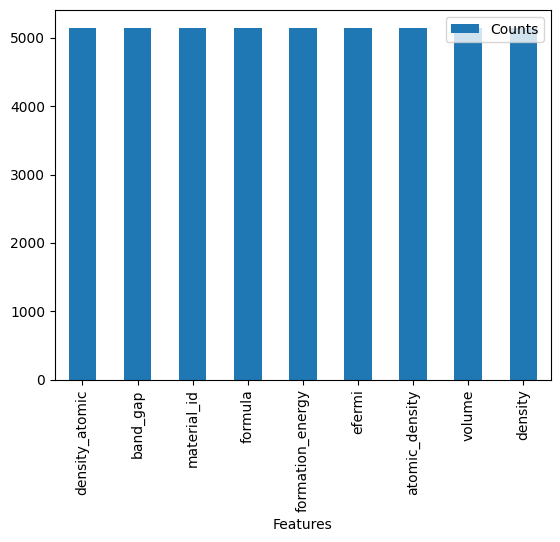

In [211]:
#showing the data is balanced in dataframe (df), the box plot of the dataset with datacounts of all columns show that they are balanced
import matplotlib.pyplot as plt
fig = plt.figure()
data = pd.DataFrame({
    'Features': ['density_atomic','band_gap','material_id','formula','formation_energy','efermi','atomic_density','volume','density'],
    'Counts': [5149, 5149, 5149, 5149, 5149, 5149, 5149, 5149, 5149],
})
data.plot(x="Features", y=["Counts"], kind="bar")
plt.show()

In [17]:
# How many unique compositions do we have?
mp_query["formula"].astype("string").unique()

<StringArray>
[ 'Mg149Tc',    'K5As4',     'CuS2', 'Sm14Ag51',     'GdB6',    'Th2C3',
      'YIr',    'TmSe2',    'ZrCr2',    'CaCu5',
 ...
     'Zr3O',      'PI3',      'V2N',     'TmPd',    'Zr3Te',    'Mg2Ge',
     'Si2W',      'FeO',    'CeRh3',    'AsPd2']
Length: 5149, dtype: string

In [221]:
#uploading the csv file
from google.colab import files
uploaded = files.upload()

Saving periodic_table_final.csv to periodic_table_final (1).csv


In [222]:
periodic_table = pd.read_csv('periodic_table_final.csv')

print(periodic_table.to_string())

     Unnamed: 0  AtomicNumber        Element Symbol  AtomicMass  NumberofNeutrons  NumberofProtons  NumberofElectrons  Period  Group       Phase Natural Metal Nonmetal Metalloid                  Type  AtomicRadius  Electronegativity  FirstIonization    Density  MeltingPoint  BoilingPoint  NumberOfIsotopes
0             0           1.0       Hydrogen      H       1.007               0.0              1.0                1.0     1.0    1.0         gas     yes   NaN      yes       NaN              Nonmetal          0.79               2.20          13.5984   0.000090        14.175         20.28               3.0
1             1           2.0         Helium     He       4.002               2.0              2.0                2.0     1.0   18.0         gas     yes   NaN      yes       NaN             Noble Gas          0.49               0.00          24.5874   0.000179         0.950          4.22               5.0
2             2           3.0        Lithium     Li       6.941               4

In [18]:
periodic_table.set_index("Symbol", inplace=True)
periodic_table.loc["O"]["AtomicRadius"] #will give you the atomic radius for O.

NameError: ignored

In [19]:
#importing composition
from pymatgen.core import Composition
#comp = Composition('df.formula')
#comp.elements # this will give you the elements
#comp.get_atomic_fraction('df.formula') # this will give you the atomic fraction of O in FeO2.

In [21]:
df['formula']
Comp = []
for value in df['formula']:
    Comp.append(Composition(value))
Comp

[Comp: Mg149 Tc1,
 Comp: K5 As4,
 Comp: Cu1 S2,
 Comp: Sm14 Ag51,
 Comp: Gd1 B6,
 Comp: Th2 C3,
 Comp: Y1 Ir1,
 Comp: Tm1 Se2,
 Comp: Zr1 Cr2,
 Comp: Ca1 Cu5,
 Comp: Nd1 Os2,
 Comp: Ho2 S3,
 Comp: Ni1 Cl2,
 Comp: Sn1 Rh1,
 Comp: Zr7 Pt10,
 Comp: Nd5 Co2,
 Comp: Ac2 O3,
 Comp: Er13 Zn58,
 Comp: Au3 F8,
 Comp: Eu1 Mg2,
 Comp: P4 S3,
 Comp: Tm3 Ru1,
 Comp: Gd1 Se2,
 Comp: Tl7 Sb2,
 Comp: Ho2 In1,
 Comp: Ta1 Si2,
 Comp: Ti2 O1,
 Comp: La5 Ru2,
 Comp: Dy13 Zn58,
 Comp: Zn3 N2,
 Comp: In4 Te3,
 Comp: Ta1 As1,
 Comp: Eu1 Pb1,
 Comp: Be1 H2,
 Comp: Zr1 Se2,
 Comp: Sm1 H2,
 Comp: Ag3 Pd1,
 Comp: Tb11 Sn10,
 Comp: Ti2 Pd1,
 Comp: Yb3 Ge8,
 Comp: Li17 Sn4,
 Comp: Eu1 Hg3,
 Comp: Ca5 Au3,
 Comp: Sr3 P4,
 Comp: Mg149 In1,
 Comp: Na1 Cl7,
 Comp: Nb3 B4,
 Comp: Pt1 Pb4,
 Comp: U3 Sb4,
 Comp: Tb1 Br3,
 Comp: Ba1 F3,
 Comp: Yb5 Pt3,
 Comp: Sb2 Os1,
 Comp: Th2 Se3,
 Comp: Pr1 Se2,
 Comp: Nb5 Sb4,
 Comp: Te1 I1,
 Comp: Nb2 Pd1,
 Comp: Tb2 Co17,
 Comp: Ho2 C1,
 Comp: Rb4 Ge23,
 Comp: Tb1 Zn2,
 Comp: Ho1 H

In [22]:
df['Composition'] = Comp
df

{'density_atomic': [22.87735562007094,
  32.27365225714584,
  16.316454250245343,
  20.40166145992799,
  9.856147869666348,
  15.711840038522308,
  19.936594241617506,
  22.114516202603454,
  14.974875518724934,
  14.762232928222714,
  18.78755114043938,
  23.401728946775613,
  20.72535972363717,
  17.180777320029758,
  18.122393425848937,
  27.096454121571217,
  18.30224477209263,
  17.116077604714693,
  14.541642920494814,
  29.245281330131306,
  26.878623414603698,
  24.985836206153724,
  23.414707693817096,
  31.012842999211472,
  27.469953041188393,
  14.429782202565336,
  12.14818704269804,
  30.068417087456357,
  17.353318185299152,
  11.519590500913843,
  33.17724733524991,
  17.39634109408656,
  32.256251692912265,
  7.795507916544616,
  26.834637708403644,
  12.954727808920955,
  16.64018171268815,
  26.966141315831724,
  15.956166334457132,
  21.334578192240432,
  18.102601686698755,
  26.12920439386003,
  27.869670871912888,
  26.155616151636888,
  22.969659438240683,
  26.

In [227]:
#from matminer.datasets import get_available_datasets
#get_available_datasets()

In [228]:
#from matminer.datasets import load_dataset
#mat_df = load_dataset("mp_all_20181018")

In [229]:
#from pymatgen.core import Composition
#comp = Composition('LiFePO4')
#df['Composition']
#comp = []
#for value in df['Composition']:
    #comp.average_electroneg
# You can get the average electronetativity of a composition:
#print(comp.average_electroneg)

AttributeError: ignored

In [23]:
pd.DataFrame.from_dict(df)

density_atomic  band_gap material_id   formula  formation_energy  \
0          22.877356    0.0978  mp-1185636   Mg149Tc         -0.018674   
1          32.273652    0.0000  mp-1223503     K5As4         -0.437151   
2          16.316454    0.0000   mp-849086      CuS2         -0.432674   
3          20.401661    0.0000  mp-1219378  Sm14Ag51         -0.246306   
4           9.856148    0.0000    mp-22266      GdB6         -0.456620   
...              ...       ...         ...       ...               ...   
5144       21.525290    0.1520      mp-408     Mg2Ge         -0.268911   
5145       13.438418    0.0000     mp-1620      Si2W         -0.345997   
5146       10.623560    1.8157  mp-1274279       FeO         -1.482156   
5147       16.443801    0.0000     mp-1518     CeRh3         -0.634512   
5148       15.707060    0.0000     mp-8073     AsPd2         -0.373166   

         efermi  atomic_density       volume    density  metal Composition  
0      3.331855       22.877356  3431.603343   1.799824  False    (Mg, Tc)  
1      1.684900       32.273652   290.462870   2.830869   True     (K, As)  
2      6.011833       16.316454    97.898726   4.331231   True     (Cu, S)  
3      3.305880       20.401661  1326.107995   9.524555   True    (Sm, Ag)  
4      6.356128        9.856148    68.993035   5.345935   True     (Gd, B)  
...         ...             ...          ...        ...    ...         ...  
5144   3.300605       21.525290    64.575869   3.117889  False    (Mg, Ge)  
5145  10.164066       13.438418    40.315255   9.885778   True     (Si, W)  
5146   4.160448       10.623560    84.988477   5.614899  False     (Fe, O)  
5147   7.900701       16.443801    65.775204  11.331077   True    (Ce, Rh)  
5148   5.608863       15.707060   188.484715  10.140650   True    (As, Pd)  

[5149 rows x 11 columns]

In [24]:
pip install matminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.9/648.9 kB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 29.1 MB/s eta 0:00:00


In [25]:
#doing an element fraction showing compsotion of all the compounds in unique columns
from matminer.featurizers.composition import ElementFraction
ef = ElementFraction()

In [26]:
df2 = ef.featurize_dataframe(pd.DataFrame.from_dict(df),'Composition')

ElementFraction:   0%|          | 0/5149 [00:00<?, ?it/s]

In [27]:
pd.DataFrame.from_dict(df2)

density_atomic  band_gap material_id   formula  formation_energy  \
0          22.877356    0.0978  mp-1185636   Mg149Tc         -0.018674   
1          32.273652    0.0000  mp-1223503     K5As4         -0.437151   
2          16.316454    0.0000   mp-849086      CuS2         -0.432674   
3          20.401661    0.0000  mp-1219378  Sm14Ag51         -0.246306   
4           9.856148    0.0000    mp-22266      GdB6         -0.456620   
...              ...       ...         ...       ...               ...   
5144       21.525290    0.1520      mp-408     Mg2Ge         -0.268911   
5145       13.438418    0.0000     mp-1620      Si2W         -0.345997   
5146       10.623560    1.8157  mp-1274279       FeO         -1.482156   
5147       16.443801    0.0000     mp-1518     CeRh3         -0.634512   
5148       15.707060    0.0000     mp-8073     AsPd2         -0.373166   

         efermi  atomic_density       volume    density  metal  ... Pu  Am  \
0      3.331855       22.877356  3431.603343   1.799824  False  ...  0   0   
1      1.684900       32.273652   290.462870   2.830869   True  ...  0   0   
2      6.011833       16.316454    97.898726   4.331231   True  ...  0   0   
3      3.305880       20.401661  1326.107995   9.524555   True  ...  0   0   
4      6.356128        9.856148    68.993035   5.345935   True  ...  0   0   
...         ...             ...          ...        ...    ...  ... ..  ..   
5144   3.300605       21.525290    64.575869   3.117889  False  ...  0   0   
5145  10.164066       13.438418    40.315255   9.885778   True  ...  0   0   
5146   4.160448       10.623560    84.988477   5.614899  False  ...  0   0   
5147   7.900701       16.443801    65.775204  11.331077   True  ...  0   0   
5148   5.608863       15.707060   188.484715  10.140650   True  ...  0   0   

      Cm  Bk  Cf  Es  Fm  Md  No  Lr  
0      0   0   0   0   0   0   0   0  
1      0   0   0   0   0   0   0   0  
2      0   0   0   0   0   0   0   0  
3      0   0   0   0   0   0   0   0  
4      0   0   0   0   0   0   0   0  
...   ..  ..  ..  ..  ..  ..  ..  ..  
5144   0   0   0   0   0   0   0   0  
5145   0   0   0   0   0   0   0   0  
5146   0   0   0   0   0   0   0   0  
5147   0   0   0   0   0   0   0   0  
5148   0   0   0   0   0   0   0   0  

[5149 rows x 114 columns]

In [28]:
#adding Atomic Packing Efficiency of all compounds (this is feature addition)
from matminer.featurizers.composition import AtomicPackingEfficiency
apf = AtomicPackingEfficiency()
apf.feature_labels()

['mean simul. packing efficiency',
 'mean abs simul. packing efficiency',
 'dist from 1 clusters |APE| < 0.010',
 'dist from 3 clusters |APE| < 0.010',
 'dist from 5 clusters |APE| < 0.010']

In [29]:
df = apf.featurize_dataframe(pd.DataFrame.from_dict(df),'Composition',ignore_errors=True)

AtomicPackingEfficiency:   0%|          | 0/5149 [00:00<?, ?it/s]

In [30]:
pd.DataFrame.from_dict(df)

density_atomic  band_gap material_id   formula  formation_energy  \
0          22.877356    0.0978  mp-1185636   Mg149Tc         -0.018674   
1          32.273652    0.0000  mp-1223503     K5As4         -0.437151   
2          16.316454    0.0000   mp-849086      CuS2         -0.432674   
3          20.401661    0.0000  mp-1219378  Sm14Ag51         -0.246306   
4           9.856148    0.0000    mp-22266      GdB6         -0.456620   
...              ...       ...         ...       ...               ...   
5144       21.525290    0.1520      mp-408     Mg2Ge         -0.268911   
5145       13.438418    0.0000     mp-1620      Si2W         -0.345997   
5146       10.623560    1.8157  mp-1274279       FeO         -1.482156   
5147       16.443801    0.0000     mp-1518     CeRh3         -0.634512   
5148       15.707060    0.0000     mp-8073     AsPd2         -0.373166   

         efermi  atomic_density       volume    density  metal Composition  \
0      3.331855       22.877356  3431.603343   1.799824  False    (Mg, Tc)   
1      1.684900       32.273652   290.462870   2.830869   True     (K, As)   
2      6.011833       16.316454    97.898726   4.331231   True     (Cu, S)   
3      3.305880       20.401661  1326.107995   9.524555   True    (Sm, Ag)   
4      6.356128        9.856148    68.993035   5.345935   True     (Gd, B)   
...         ...             ...          ...        ...    ...         ...   
5144   3.300605       21.525290    64.575869   3.117889  False    (Mg, Ge)   
5145  10.164066       13.438418    40.315255   9.885778   True     (Si, W)   
5146   4.160448       10.623560    84.988477   5.614899  False     (Fe, O)   
5147   7.900701       16.443801    65.775204  11.331077   True    (Ce, Rh)   
5148   5.608863       15.707060   188.484715  10.140650   True    (As, Pd)   

      mean simul. packing efficiency  mean abs simul. packing efficiency  \
0                           0.024544                            0.025063   
1                           0.007185                            0.029236   
2                           0.027002                            0.027002   
3                          -0.023277                            0.032995   
4                          -0.001403                            0.016236   
...                              ...                                 ...   
5144                       -0.010832                            0.010832   
5145                        0.026862                            0.026862   
5146                       -0.019761                            0.028471   
5147                        0.011611                            0.011611   
5148                        0.005244                            0.020156   

      dist from 1 clusters |APE| < 0.010  dist from 3 clusters |APE| < 0.010  \
0                               0.367696                            0.430549   
1                               0.000000                            0.086050   
2                               0.138648                            0.155757   
3                               0.068898                            0.155672   
4                               0.137381                            0.284557   
...                                  ...                                 ...   
5144                            0.029463                            0.159393   
5145                            0.138648                            0.155757   
5146                            0.037216                            0.129066   
5147                            0.117851                            0.121986   
5148                            0.094281                            0.172848   

      dist from 5 clusters |APE| < 0.010  
0                               0.493887  
1                               0.148432  
2                               0.184962  
3                               0.198200  
4                               0.419905  
...                                  ...  
5144 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   density_atomic                      5149 non-null   float64
 1   band_gap                            5149 non-null   float64
 2   material_id                         5149 non-null   object 
 3   formula                             5149 non-null   object 
 4   formation_energy                    5149 non-null   float64
 5   efermi                              5145 non-null   float64
 6   atomic_density                      5149 non-null   float64
 7   volume                              5149 non-null   float64
 8   density                             5149 non-null   float64
 9   metal                               5149 non-null   bool   
 10  Composition                         5149 non-null   object 
 11  mean simul. packing efficiency      5086 no

In [32]:
#creating x1 and y, and then ultimately training the dataset
y = df['formation_energy'].values
print(y)

[-0.01867447 -0.43715077 -0.43267424 ... -1.48215553 -0.63451218
 -0.37316584]


In [33]:
x_1 = df.drop(["formation_energy","density_atomic","band_gap","material_id","formula","efermi","atomic_density","volume","density","metal","Composition"],axis=1)
print(x_1)

      mean simul. packing efficiency  mean abs simul. packing efficiency  \
0                           0.024544                            0.025063   
1                           0.007185                            0.029236   
2                           0.027002                            0.027002   
3                          -0.023277                            0.032995   
4                          -0.001403                            0.016236   
...                              ...                                 ...   
5144                       -0.010832                            0.010832   
5145                        0.026862                            0.026862   
5146                       -0.019761                            0.028471   
5147                        0.011611                            0.011611   
5148                        0.005244                            0.020156   

      dist from 1 clusters |APE| < 0.010  dist from 3 clusters |APE| < 0.010  \
0      

In [34]:
x_1_1 = df.drop(["density_atomic","band_gap","material_id","formula","efermi","atomic_density","volume","density","metal","Composition"],axis=1)
print(x_1_1)

      formation_energy  mean simul. packing efficiency  \
0            -0.018674                        0.024544   
1            -0.437151                        0.007185   
2            -0.432674                        0.027002   
3            -0.246306                       -0.023277   
4            -0.456620                       -0.001403   
...                ...                             ...   
5144         -0.268911                       -0.010832   
5145         -0.345997                        0.026862   
5146         -1.482156                       -0.019761   
5147         -0.634512                        0.011611   
5148         -0.373166                        0.005244   

      mean abs simul. packing efficiency  dist from 1 clusters |APE| < 0.010  \
0                               0.025063                            0.367696   
1                               0.029236                            0.000000   
2                               0.027002                       

In [35]:
x1 = x_1.fillna(0)
print(x1)

      mean simul. packing efficiency  mean abs simul. packing efficiency  \
0                           0.024544                            0.025063   
1                           0.007185                            0.029236   
2                           0.027002                            0.027002   
3                          -0.023277                            0.032995   
4                          -0.001403                            0.016236   
...                              ...                                 ...   
5144                       -0.010832                            0.010832   
5145                        0.026862                            0.026862   
5146                       -0.019761                            0.028471   
5147                        0.011611                            0.011611   
5148                        0.005244                            0.020156   

      dist from 1 clusters |APE| < 0.010  dist from 3 clusters |APE| < 0.010  \
0      

In [36]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   mean simul. packing efficiency      5149 non-null   float64
 1   mean abs simul. packing efficiency  5149 non-null   float64
 2   dist from 1 clusters |APE| < 0.010  5149 non-null   float64
 3   dist from 3 clusters |APE| < 0.010  5149 non-null   float64
 4   dist from 5 clusters |APE| < 0.010  5149 non-null   float64
dtypes: float64(5)
memory usage: 201.3 KB


In [37]:
from numpy import inf
import numpy as np
x1[x1 == -inf] = 0
x1.replace([np.inf, -np.inf], 0, inplace=True)

In [144]:
#training the dataset for analyzing the effect of Atomic Packing Efficiency (APF) features on formation energy
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y, test_size=0.2, random_state=1, shuffle = True)
x1_train

mean simul. packing efficiency  mean abs simul. packing efficiency  \
3570                       -0.025107                            0.051626   
1518                       -0.009008                            0.009008   
3887                        0.042387                            0.042387   
1885                        0.023870                            0.023870   
1947                        0.005546                            0.011391   
...                              ...                                 ...   
2895                        0.006301                            0.007839   
2763                       -0.055280                            0.055280   
905                        -0.013797                            0.013797   
3980                        0.048374                            0.051864   
235                        -0.003165                            0.012313   

      dist from 1 clusters |APE| < 0.010  dist from 3 clusters |APE| < 0.010  \
3570                            0.067344                            0.156370   
1518                            0.000000                            0.018131   
3887                            0.140781                            0.179105   
1885                            0.123463                            0.224478   
1947                            0.000000                            0.078154   
...                                  ...                                 ...   
2895                            0.023570                            0.048263   
2763                            0.080353                            0.160349   
905                             0.037216                            0.088354   
3980                            0.082496                            0.145203   
235                             0.000000                            0.026189   

      dist from 5 clusters |APE| < 0.010  
3570                            0.369246  
1518                            0.151745  
3887                            0.258032  
1885                            0.325494  
1947                            0.159744  
...                                  ...  
2895                            0.082833  
2763                            0.248185  
905                             0.138110  
3980                            0.234829  
235                             0.104157  

[4119 rows x 5 columns]

In [39]:
x1_test

mean simul. packing efficiency  mean abs simul. packing efficiency  \
1141                        0.029234                            0.029234   
2119                       -0.000663                            0.004174   
4016                       -0.012328                            0.012328   
1989                       -0.027389                            0.027389   
4871                       -0.005783                            0.020721   
...                              ...                                 ...   
330                        -0.009566                            0.023550   
3220                       -0.000540                            0.003172   
2236                        0.068972                            0.068972   
32                         -0.013129                            0.024578   
1045                       -0.024931                            0.024931   

      dist from 1 clusters |APE| < 0.010  dist from 3 clusters |APE| < 0.010  \
1141                            0.062392                            0.149728   
2119                            0.088388                            0.123139   
4016                            0.078567                            0.132960   
1989                            0.095321                            0.169267   
4871                            0.023570                            0.118300   
...                                  ...                                 ...   
330                             0.024811                            0.095903   
3220                            0.088388                            0.123139   
2236                            0.235702                            0.342125   
32                              0.141421                            0.252624   
1045                            0.053033                            0.198383   

      dist from 5 clusters |APE| < 0.010  
1141                            0.187485  
2119                            0.173710  
4016                            0.222861  
1989                            0.207022  
4871                            0.197249  
...                                  ...  
330                             0.150714  
3220                            0.173710  
2236                            0.457725  
32                              0.320775  
1045                            0.271586  

[1030 rows x 5 columns]

In [40]:
#Regression modeling performed here are linear, LASSO, comparing linear vs ridge and Elastic Net modelling
#Classification modeling performed here are decision tree and random forest regression modeling
#performing linear regression for APF data
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
reg.fit(x1_test,y1_test)
ypred = reg.predict(x1_test)

In [41]:
r2 = r2_score(y1_test, ypred)
r2

0.08916246928594784

In [42]:
mse = mean_squared_error(y1_test, ypred)
mse

0.4523382979507272

In [43]:
mae = mean_absolute_error(y1_test, ypred)
mae

0.4648524205539131

([<matplotlib.lines.Line2D at 0x7f80e486e0e0>], [-5, 0], 'formation energy--')

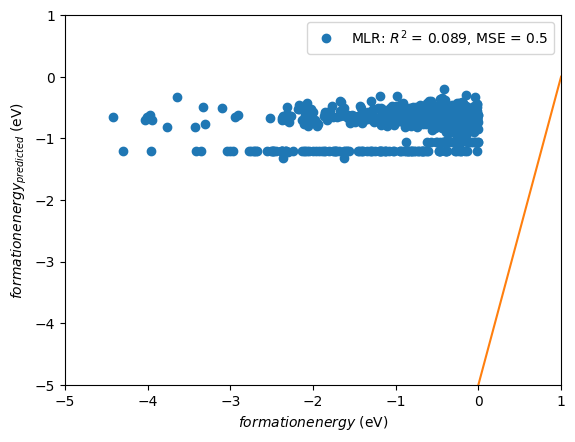

In [44]:
#Plot data
import matplotlib.pyplot as plt
label = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2, mse)
plt.plot(y1_test, ypred, "o", label = label)
plt.ylabel("$formation energy_{predicted}$ (eV)")
plt.xlabel("$formation energy$ (eV)")
plt.legend()
plt.xlim([-5,1])
plt.ylim([-5,1])
plt.plot([-5,0]), [-5,0], "formation energy--"

formation energy = -0.7 + 4.68e+00 mean simul. packing efficiency + 1.17e+00 mean abs simul. packing efficiency + -1.28e+00 dist from 1 clusters |APE| < 0.010 + 8.61e-01 dist from 3 clusters |APE| < 0.010 + -1.20e-01 dist from 5 clusters |APE| < 0.010


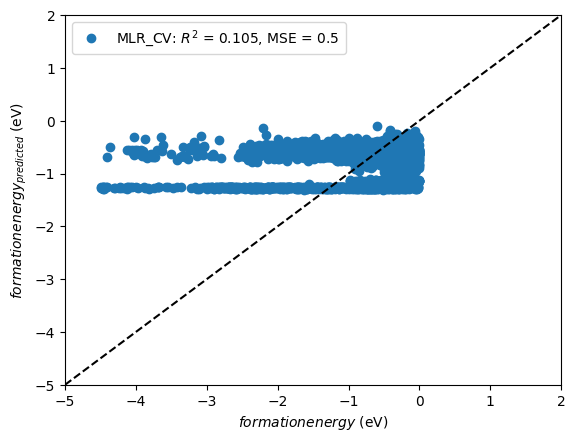

In [45]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import r2_score

kfold = KFold(n_splits=10, shuffle=True, random_state=2) # fix random state and change it later

reg_cv = linear_model.LinearRegression()
ypred_cv = cross_val_predict(reg_cv, x1, y, cv=kfold)

r2_cv = r2_score(y, ypred_cv)
mse_cv = mean_squared_error(y, ypred_cv)
label_cv = "MLR_CV: $R^2$ = %.3f, MSE = %.1f" % (r2_cv, mse_cv)

equation = ["%.2e %s" % (v, f) for v, f in zip(reg.coef_, x1.columns)]
print("formation energy = %.1f + %s" % (reg.intercept_, " + ".join(equation)))
label = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2, mse)

plt.plot(y, ypred_cv, "o", label=label_cv)
plt.ylabel(r"$formation energy_{predicted}$ (eV)")
plt.xlabel(r"$formation energy$ (eV)")
plt.legend()
plt.xlim([-5, 2])
plt.ylim([-5, 2])
plt.plot([-5, 2], [-5, 2], "k--");

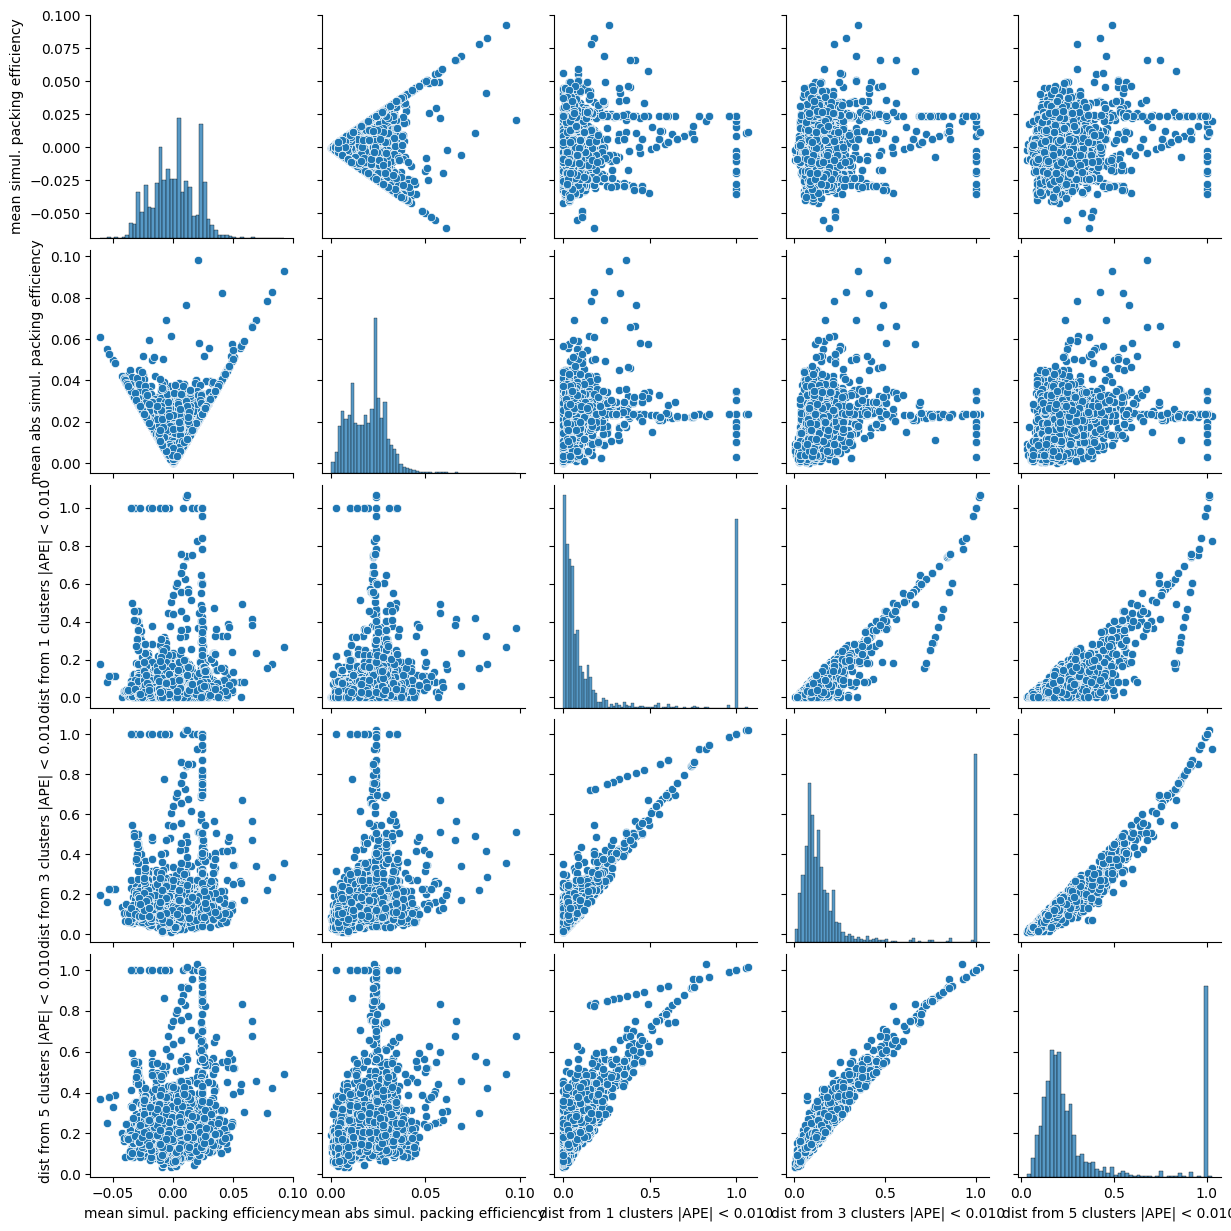

In [46]:
#performing pairplots for APF attributes (there are 5 attributes of APF in total)
import seaborn as sns
grid = sns.pairplot(df[x1.columns])

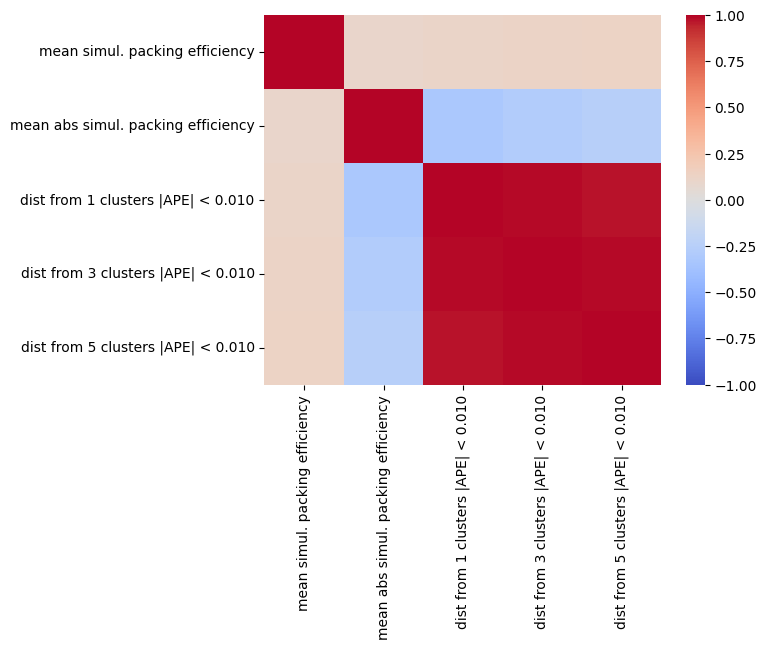

In [47]:
#heatmap of APF attributes
sns.heatmap(x1.corr(), cmap="coolwarm", vmin=-1, vmax=1);

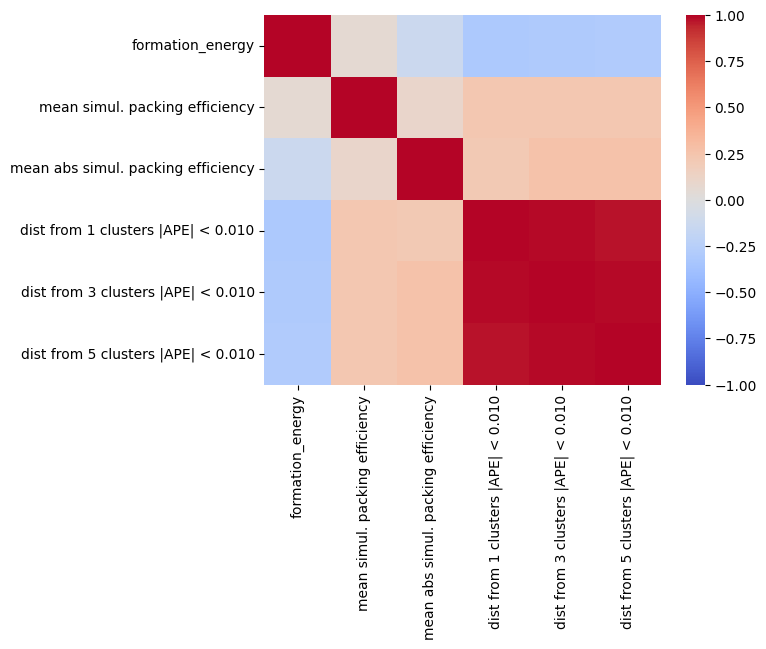

In [48]:
#heatmap of APF attributes to having an effect on the formation energy, it can be seen mean simulation packing efficiency has the highest effect
sns.heatmap(x_1_1.corr(), cmap="coolwarm", vmin=-1, vmax=1);

In [49]:
#now training the data for APF features to see its effect on band_gap
x_1_2 = df.drop(["density_atomic","formation_energy","material_id","formula","efermi","atomic_density","volume","density","metal","Composition"],axis=1)
print(x_1_2)

      band_gap  mean simul. packing efficiency  \
0       0.0978                        0.024544   
1       0.0000                        0.007185   
2       0.0000                        0.027002   
3       0.0000                       -0.023277   
4       0.0000                       -0.001403   
...        ...                             ...   
5144    0.1520                       -0.010832   
5145    0.0000                        0.026862   
5146    1.8157                       -0.019761   
5147    0.0000                        0.011611   
5148    0.0000                        0.005244   

      mean abs simul. packing efficiency  dist from 1 clusters |APE| < 0.010  \
0                               0.025063                            0.367696   
1                               0.029236                            0.000000   
2                               0.027002                            0.138648   
3                               0.032995                            0.068898   

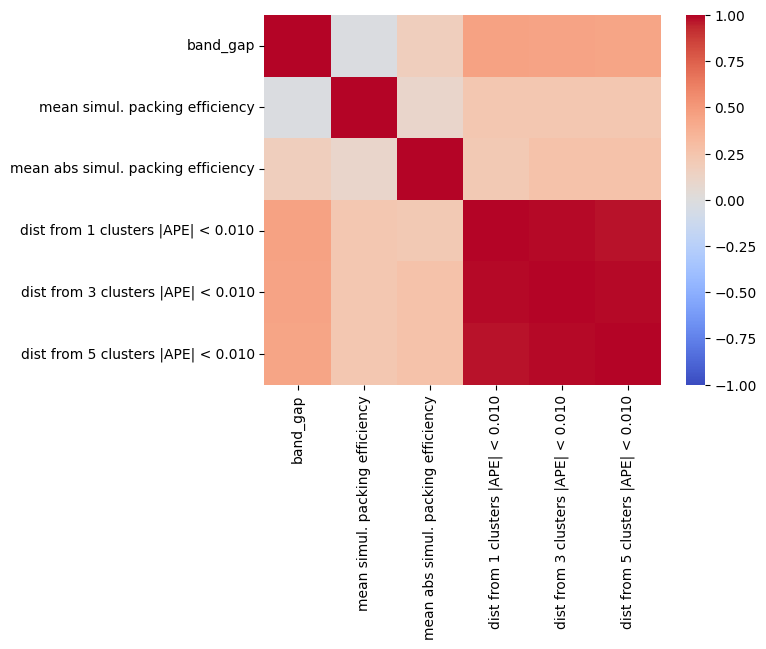

In [50]:
#heat map of APF attributes showing their effect on band_gap, it can be clearly seen distance from clusters |APE| have the highest effect on band_gap
sns.heatmap(x_1_2.corr(), cmap="coolwarm", vmin=-1, vmax=1);

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x1)
means_ = scaler.mean_
stds_ = scaler.scale_
z = scaler.transform(x1)

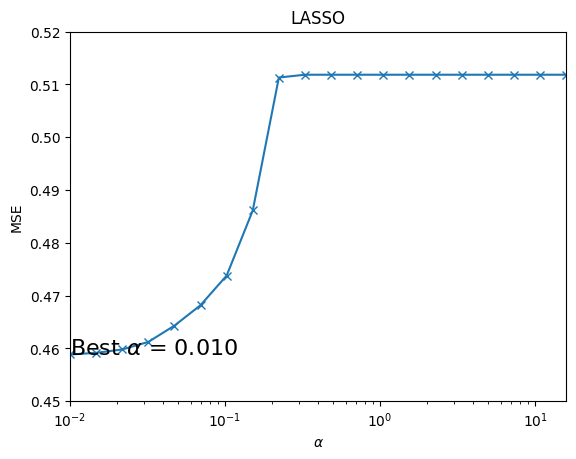

In [52]:
#performing LASSO modelling to see the effect of APF attributes on formation energy
from sklearn.model_selection import cross_validate
import numpy as np

alphas = np.logspace(-2, 1.2, 20)
cv_results = []
coeffs = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(z, y)
    scores = cross_validate(lasso, z, y, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))

features = ['mean simul. packing efficiency','mean abs simul. packing efficiency','dist from 1 clusters |APE| < 0.010','dist from 3 clusters |APE| < 0.010','dist from 5 clusters |APE| < 0.010']
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
plt.xlim([1e-2, 10**1.2])
plt.ylim((0.45, 0.52))
plt.xscale("log")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")
plt.title("LASSO")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);

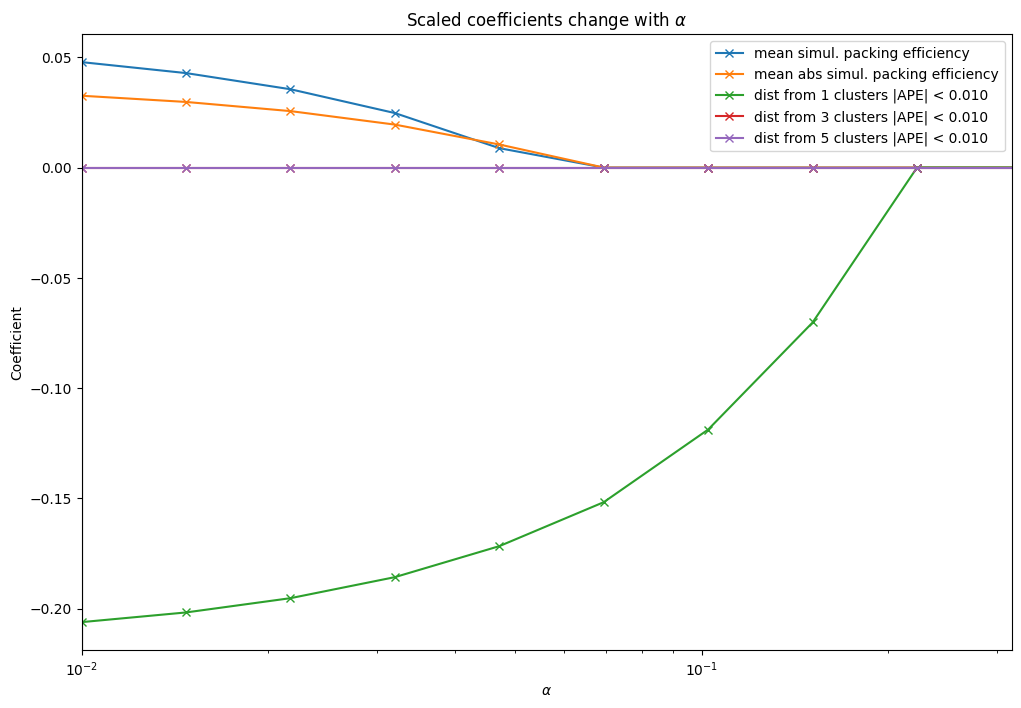

In [53]:
#scaled coefficients of APF attributes on formation energy
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], "-x", label=f)
    plt.xscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Coefficient")
    plt.title(r"Scaled coefficients change with $\alpha$")
plt.legend()
plt.axvline(x = best_alpha, color = 'black')
plt.xlim([1e-2, 10**-0.5]);

In [54]:
reg = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
reg.fit(x1, y)

real_coef = reg.coef_ / stds_  # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs

equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("formation energy = %.1f + %s" % (real_interp, " + ".join(equation)))

formation energy = -0.2 + -1.67e+00 dist from 1 clusters |APE| < 0.010


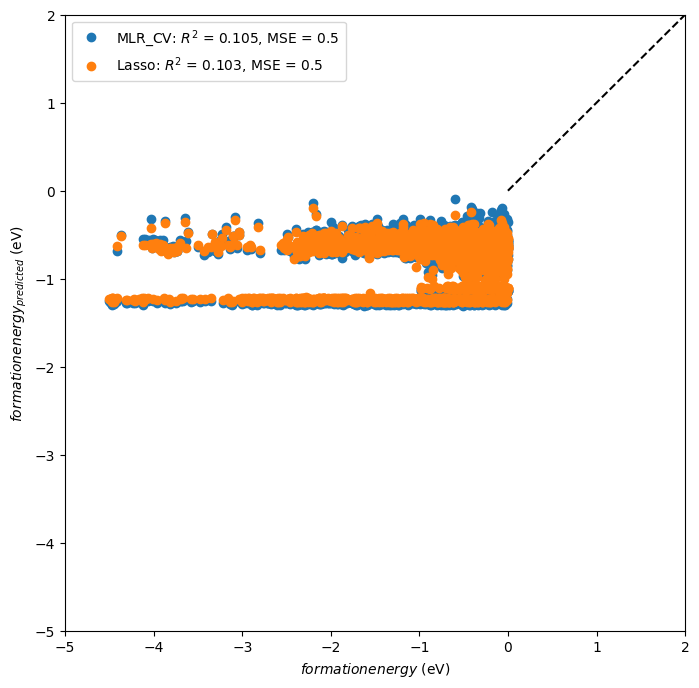

In [55]:
#linear model lasso regression of APF features on formation energy
lasso = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
ypred_lasso = cross_val_predict(lasso, z, y, cv=kfold)
r2_lasso = r2_score(y, ypred_lasso)
mse_lasso = mean_squared_error(y, ypred_lasso)
label_lasso = "Lasso: $R^2$ = %.3f, MSE = %.1f" % (r2_lasso, mse_lasso)

f, ax = plt.subplots(figsize=(8, 8))
plt.plot(y, ypred_cv, "o", label=label_cv)
plt.plot(y, ypred_lasso, "o", label=label_lasso)
l = plt.ylabel("$formation energy_{predicted}$ (eV)")
l = plt.xlabel("$formation energy$ (eV)")
plt.legend()
plt.xlim([-5, 2])
plt.ylim([-5, 2])
plt.plot([0, 5], [0, 5], "k--");

In [56]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x1_train,y1_train)

DecisionTreeRegressor(max_depth=5)

In [58]:
x1_train, x1_val, y1_train, y1_val = train_test_split(x1_train, y1_train, test_size=0.25, random_state=2, shuffle = True) #0.25 x 0.8 = 0.2
x1_val

mean simul. packing efficiency  mean abs simul. packing efficiency  \
154                         0.037590                            0.037590   
106                         0.014038                            0.024355   
691                        -0.000133                            0.007916   
1650                        0.000454                            0.022242   
4437                       -0.029181                            0.029181   
...                              ...                                 ...   
2988                        0.006295                            0.006295   
235                        -0.003165                            0.012313   
3973                       -0.003580                            0.024408   
2536                       -0.002080                            0.016956   
3805                        0.009810                            0.009810   

      dist from 1 clusters |APE| < 0.010  dist from 3 clusters |APE| < 0.010  \
154                             0.042855                            0.103178   
106                             0.035355                            0.198275   
691                             0.067344                            0.109994   
1650                            0.437733                            0.538748   
4437                            0.020797                            0.091188   
...                                  ...                                 ...   
2988                            0.012627                            0.053422   
235                             0.000000                            0.026189   
3973                            0.124784                            0.191175   
2536                            0.035355                            0.129636   
3805                            0.198486                            0.223297   

      dist from 5 clusters |APE| < 0.010  
154                             0.203328  
106                             0.288671  
691                             0.160278  
1650                            0.639763  
4437                            0.160218  
...                                  ...  
2988                            0.106923  
235                             0.104157  
3973                            0.257555  
2536                            0.203820  
3805                            0.255758  

[1030 rows x 5 columns]

In [59]:
y_pred_val=model.predict(x1_val)
mse = mean_squared_error(y1_val, y_pred_val)
r2 = r2_score(y1_val, y_pred_val)
print("Mean Squared Error VALIDATION:", mse)
print("R-squared VALIDATION:", r2)

Mean Squared Error VALIDATION: 0.34714548353476254
R-squared VALIDATION: 0.3123615474443838


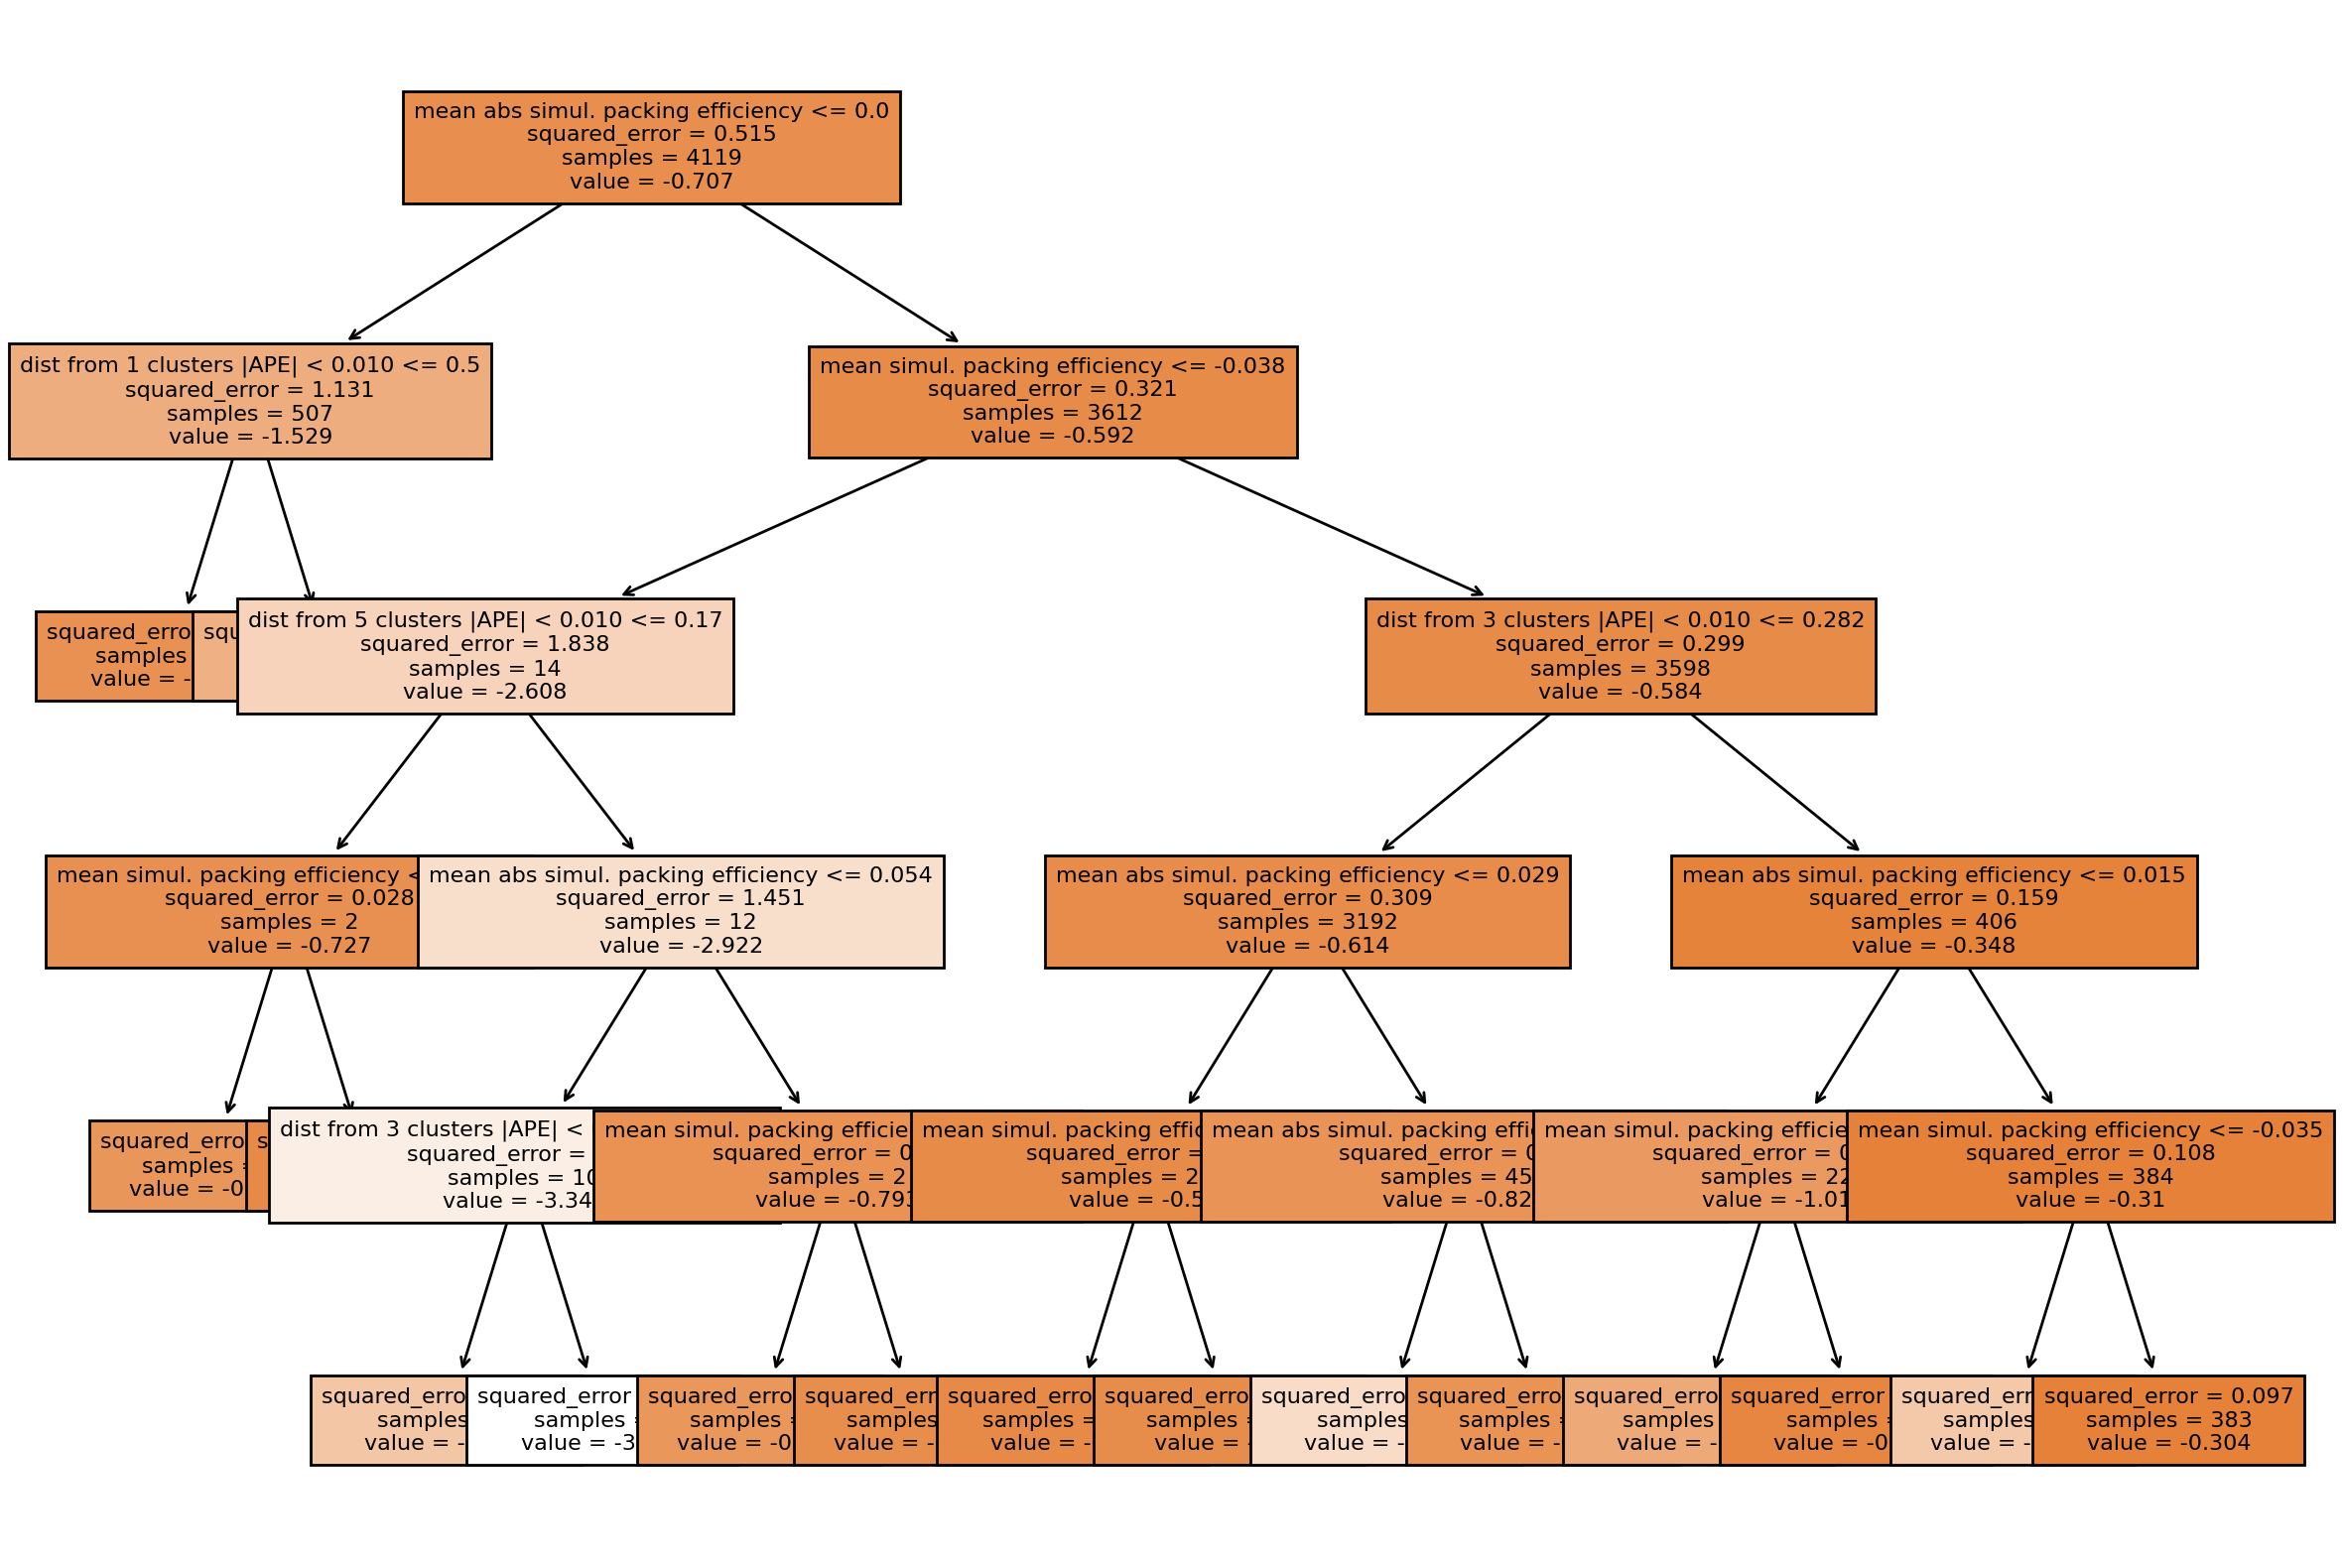

In [60]:
#decision tree regression of APF attributes on formation energy
from sklearn import tree
plt.figure(figsize=(14,10),dpi=200)
tree.plot_tree(model, filled=True, feature_names=x1.columns,fontsize=8)
plt.show()

In [163]:
#put your code here
import numpy as np

#Defining the range of max depth values
max_depth_values = range(1,21)

#Creating lists to store MSE, MAE and R-squared values for all the split sets
mse_train_values = []
r2_train_values = []
mae_train_values = []
mse_val_values = []
r2_val_values = []
mae_val_values = []
mse_test_values = []
r2_test_values = []
mae_test_values = []

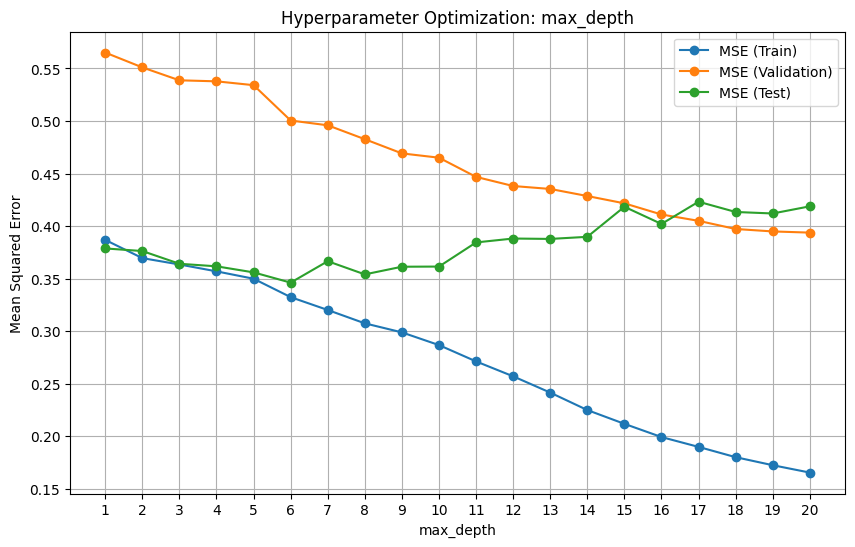

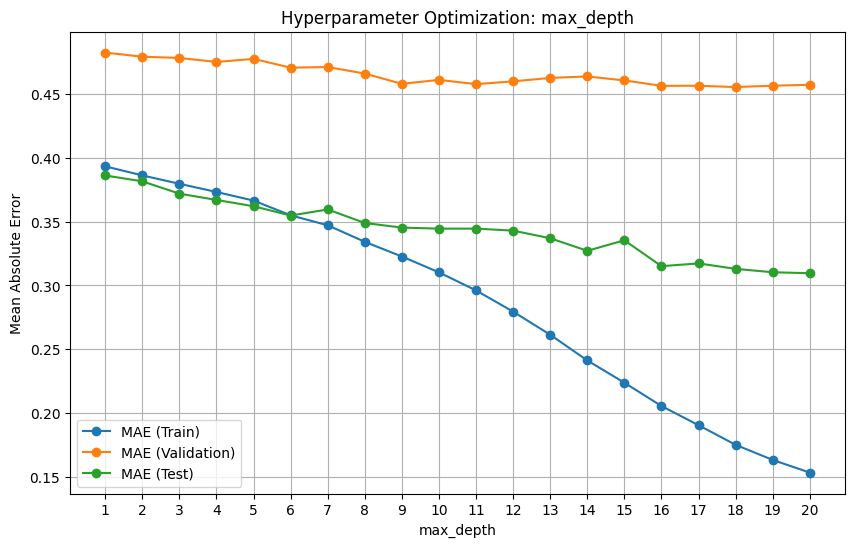

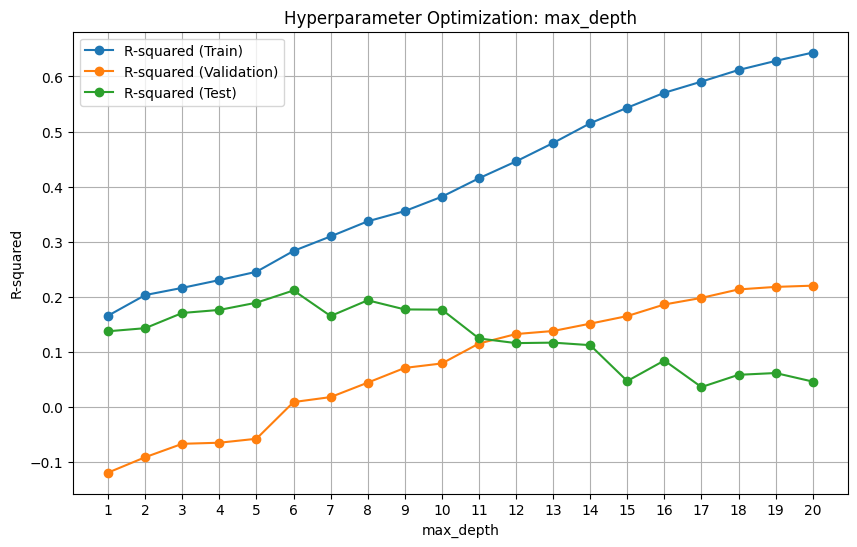

In [164]:
#Hyperparameter optimization loop for APF attributes on formation energy
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x1_train, y1_train)

    # Make predictions on the train set
    y_train_pred = model.predict(x1_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y1_train, y_train_pred)
    mae_train = mean_absolute_error(y1_train,y_train_pred)
    r2_train = r2_score(y1_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = model.predict(x1_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y1_val, y_val_pred)
    mae_val = mean_absolute_error(y1_val,y_val_pred)
    r2_val = r2_score(y1_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = model.predict(x1_test)
    # Compute MSE and R-squared for test set
    mse_test = mean_squared_error(y1_test, y_test_pred)
    mae_test = mean_absolute_error(y1_test,y_test_pred)
    r2_test = r2_score(y1_test, y_test_pred)

    # Append the results to the lists
    mse_train_values.append(mse_train)
    mae_train_values.append(mae_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    mae_val_values.append(mae_val)
    r2_val_values.append(r2_val)
    mse_test_values.append(mse_test)
    mae_test_values.append(mae_test)
    r2_test_values.append(r2_test)

# Plotting the results
#MSE
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.plot(max_depth_values, mse_test_values, 'o-', label='MSE (Test)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

#MAE
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mae_train_values, 'o-', label='MAE (Train)')
plt.plot(max_depth_values, mae_val_values, 'o-', label='MAE (Validation)')
plt.plot(max_depth_values, mae_test_values, 'o-', label='MAE (Test)')
plt.xlabel('max_depth')
plt.ylabel('Mean Absolute Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

#R2
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.plot(max_depth_values, r2_test_values, 'o-', label='R-squared (Test)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
#The reasonable depth is chosen as 7 from the r2 vs max_depth chart.

Mean Squared Error VALIDATION: 0.5058076309328646
Mean Absolute Error VALIDATION: 0.47219861569971205
R-squared VALIDATION: -0.001922228928171732
Mean Squared Error TESTING: 0.3482789314834562
Mean Absolute Error TESTING: 0.35587430519011815
R-squared TESTING: 0.2064987019895056


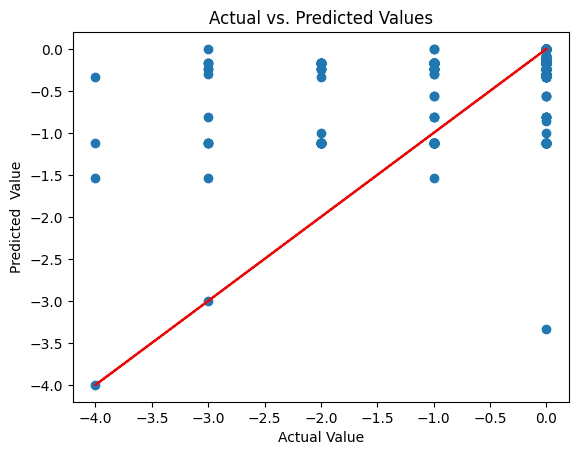

Mean Squared Error: 0.3482789314834562
Mean Absolute Error: 0.35587430519011815
R-squared: 0.2064987019895056


In [165]:
#actual vs predicted value prediction
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
model = DecisionTreeRegressor(max_depth=6)
model.fit(x1_train, y1_train)

# Make predictions on the validation set
y_pred = model.predict(x1_val)
# Calculate evaluation metrics on the validation set
mse = mean_squared_error(y1_val, y_pred)
mae = mean_absolute_error(y1_val, y_pred)
r2 = r2_score(y1_val, y_pred)
print("Mean Squared Error VALIDATION:", mse)
print("Mean Absolute Error VALIDATION:", mae)
print("R-squared VALIDATION:", r2)

# Make predictions on the TESTING set
y_pred = model.predict(x1_test)
# Calculate evaluation metrics on the TESTING set
mse = mean_squared_error(y1_test, y_pred)
mae = mean_absolute_error(y1_test, y_pred)
r2 = r2_score(y1_test, y_pred)
print("Mean Squared Error TESTING:", mse)
print("Mean Absolute Error TESTING:", mae)
print("R-squared TESTING:", r2)

# Scatter plot of actual vs. predicted values
plt.scatter(y1_test, y_pred)
plt.plot(y1_test, y1_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
#Thus the results from decision tree model and linear regression are different. This can be seen from the actual vs predicted plot below.

Mean Squared Error TRAIN: 0.1710045599247349
Mean Absolute Error TRAIN: 0.18950350302152885
R-squared TRAIN: 0.6311228740622357


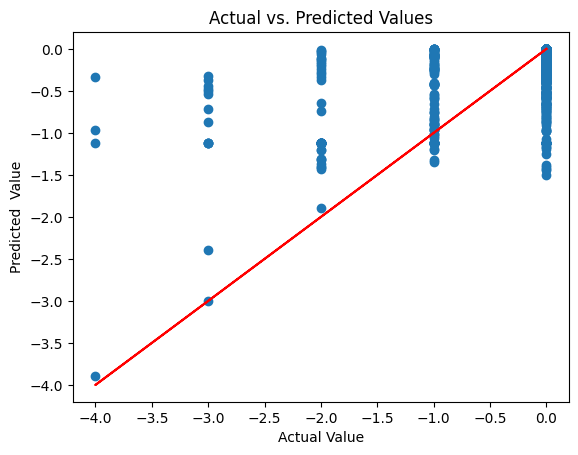

Mean Squared Error: 0.3236275205738401
Mean Absolute Error: 0.31454130408049036
R-squared: 0.26266324364367
bootstrap = True
ccp_alpha = 0.0
criterion = squared_error
max_depth = None
max_features = 1.0
max_leaf_nodes = None
max_samples = None
min_impurity_decrease = 0.0
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
n_estimators = 100
n_jobs = None
oob_score = False
random_state = 42
verbose = 0
warm_start = False


In [166]:
#random forrest regressor for formation energy
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(x1_train, y1_train)

# Make predictions on the TRAIN set
y_pred = model.predict(x1_train)

# Compute MSE, MAE and R-squared
mse_train = mean_squared_error(y1_train, y_pred)
mae_train = mean_absolute_error(y1_train, y_pred)
r2_train = r2_score(y1_train, y_pred)
# Print the results
print("Mean Squared Error TRAIN:", mse_train)
print("Mean Absolute Error TRAIN:", mae_train)
print("R-squared TRAIN:", r2_train)

# Make predictions on the test set
y_pred = model.predict(x1_test)
# Scatter plot of actual vs. predicted values
plt.scatter(y1_test, y_pred)
plt.plot(y1_test, y1_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
mse_test = mean_squared_error(y1_test, y_pred)
mae_test = mean_absolute_error(y1_test, y_pred)
r2_test = r2_score(y1_test, y_pred)
# Print metrics
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

# Access the parameters of the model
params = model.get_params()
# Display the parameters
for param, value in params.items():
    print(param, "=", value)

In [168]:
# Saving feature names for later use
feature_list = list(x1_val.columns)
features_pandas = x1_val
feature_list_test = list(x1_test.columns)
features_pandas_test = x1_test
features = np.array(x1_val)
features_test = np.array(x1_test)

Variable: mean abs simul. packing efficiency Importance: 0.44
Variable: mean simul. packing efficiency Importance: 0.19
Variable: dist from 5 clusters |APE| < 0.010 Importance: 0.14
Variable: dist from 3 clusters |APE| < 0.010 Importance: 0.12
Variable: dist from 1 clusters |APE| < 0.010 Importance: 0.1


<ipython-input-169-50a72cfb96a0>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn')


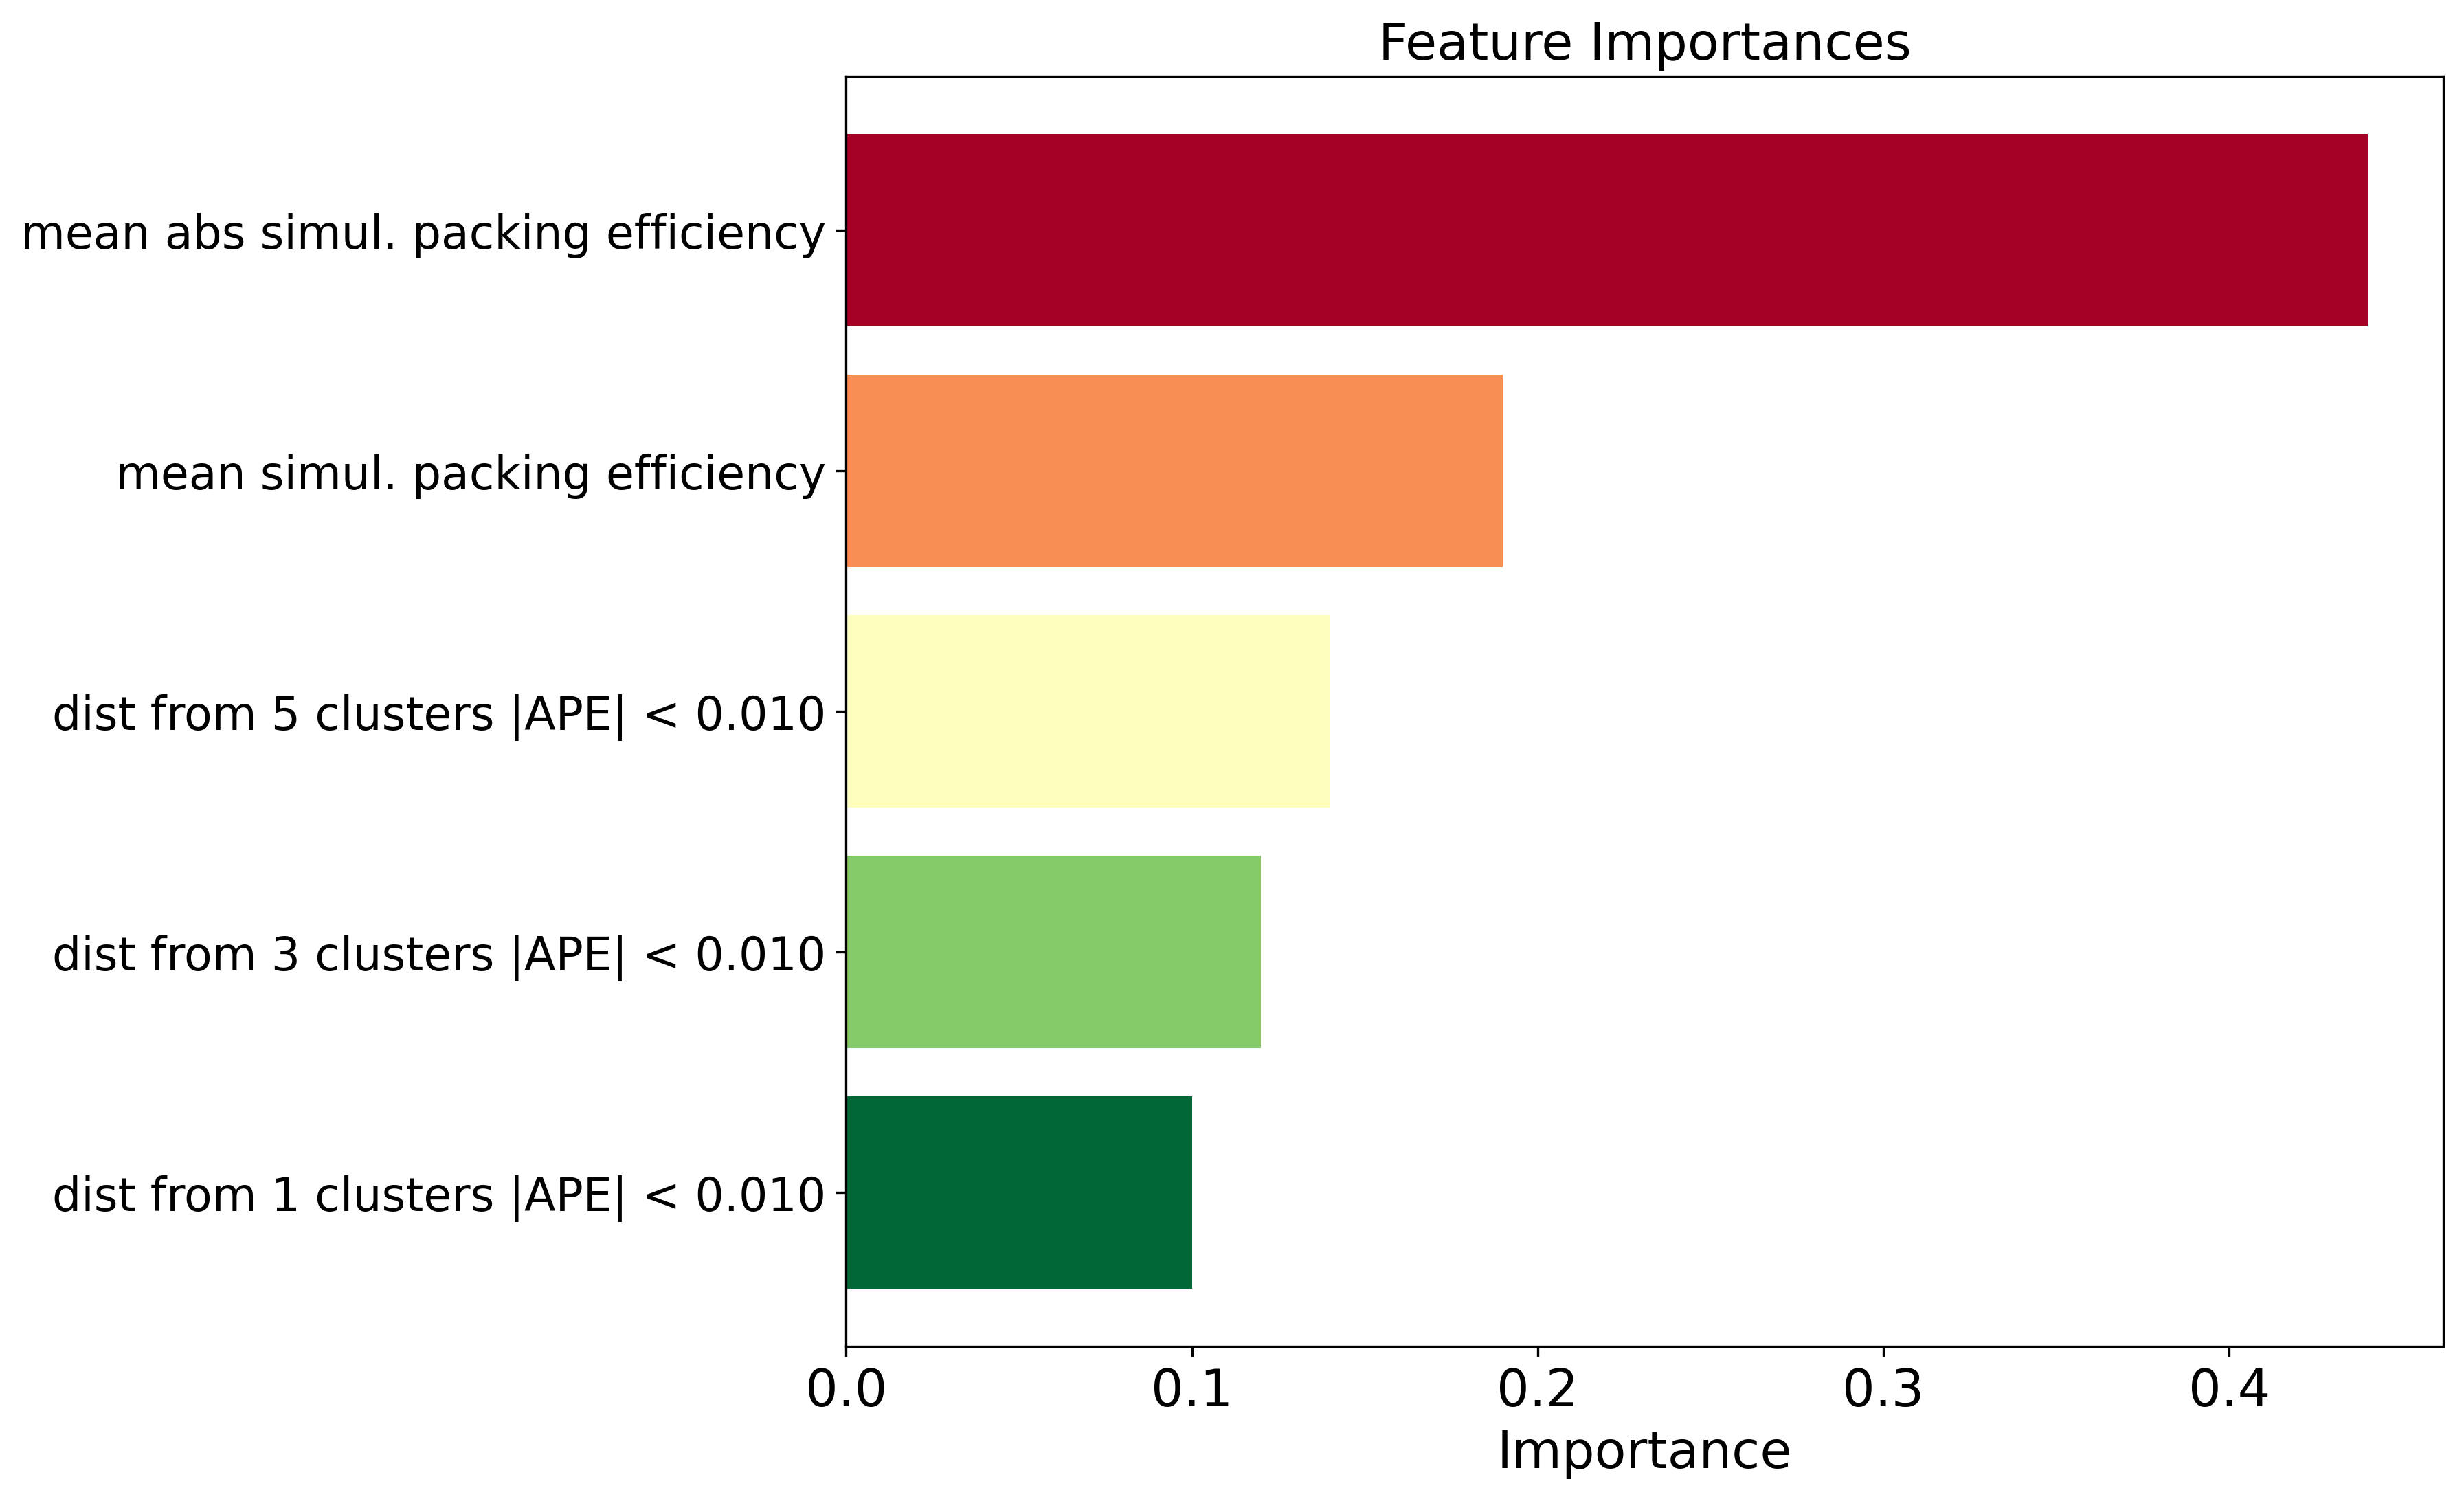

In [169]:
#performing feature importance of APF attributes (mean absolute simulation packing efficiency has the highest effect and distance from clusters have the least effect)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=300)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Define a colormap ranging from red (most important) to green (least important)
colormap = plt.cm.get_cmap('RdYlGn')
colors = [colormap(i) for i in np.linspace(0, 1, len(feature_importances))][::-1]

# Create a horizontal bar chart with colored bars
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center', color=colors)
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances],fontsize=16)
plt.xlabel('Importance',fontsize=18)
plt.title('Feature Importances',fontsize=18)
plt.xticks(fontsize=18)  # Add this line to adjust x-axis tick label font size
plt.show()

In [170]:
#performing linear regression and ridge regression for APF attributes on formation energy
lr = LinearRegression()
lr.fit(x1_train, y1_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y1_test

train_score_lr = lr.score(x1_train, y1_train)
test_score_lr = lr.score(x1_test, y1_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = linear_model.Ridge(alpha=10)

ridgeReg.fit(x1_train,y1_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x1_train, y1_train)
test_score_ridge = ridgeReg.score(x1_test, y1_test)

The train score for lr model is 0.10914701599423171
The test score for lr model is 0.0839756750657501


ValueError: ignored

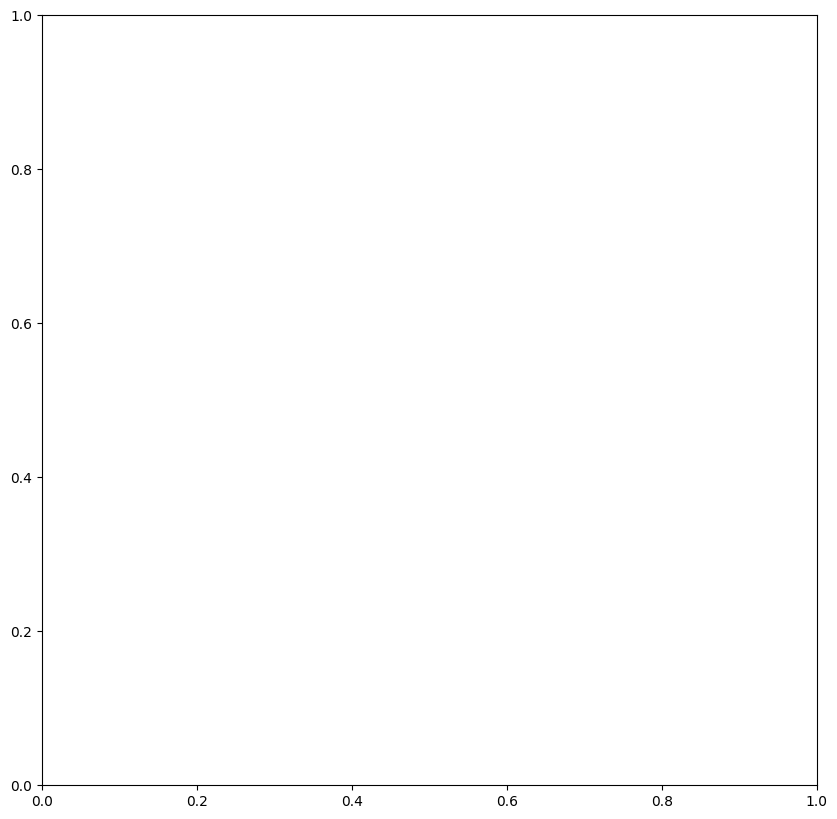

In [254]:
#comparing linear and ridge regression models
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

0.6847729701911069
0.1008467936070695
0.6570734350742548
0.07684781744022329


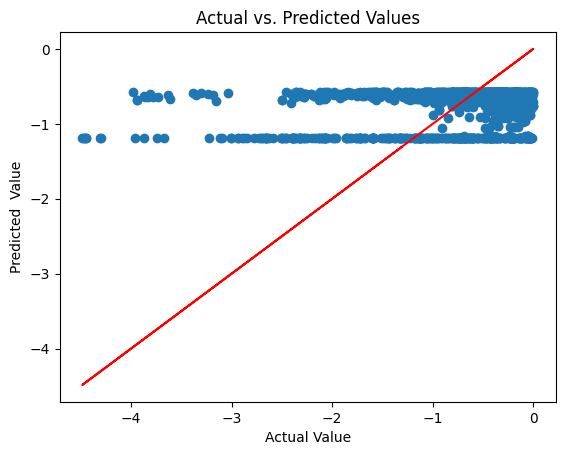

In [120]:
#Elastic Net modelling for APF attributes on formation energy

from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x1_train, y1_train)
pred_train_enet= model_enet.predict(x1_train)
print(np.sqrt(mean_squared_error(y1_train,pred_train_enet)))
print(r2_score(y1_train, pred_train_enet))

pred_test_enet= model_enet.predict(x1_test)
print(np.sqrt(mean_squared_error(y1_test,pred_test_enet)))
print(r2_score(y1_test, pred_test_enet))

# Scatter plot of actual vs. predicted values
plt.scatter(y1_test, pred_test_enet)
plt.plot(y1_test, y1_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()

# **Materials Project DB**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   density_atomic                      5149 non-null   float64
 1   band_gap                            5149 non-null   float64
 2   material_id                         5149 non-null   object 
 3   formula                             5149 non-null   object 
 4   formation_energy                    5149 non-null   float64
 5   efermi                              5145 non-null   float64
 6   atomic_density                      5149 non-null   float64
 7   volume                              5149 non-null   float64
 8   density                             5149 non-null   float64
 9   metal                               5149 non-null   bool   
 10  Composition                         5149 non-null   object 
 11  mean simul. packing efficiency      5086 no

In [172]:
#training the dataset for parameters efermi, atomic density, volume and density
x_2 = df.drop(["metal","formation_energy","Composition","density_atomic","band_gap","material_id","formula","mean simul. packing efficiency","mean abs simul. packing efficiency","dist from 1 clusters |APE| < 0.010","dist from 3 clusters |APE| < 0.010","dist from 5 clusters |APE| < 0.010"],axis=1)
x_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   efermi          5145 non-null   float64
 1   atomic_density  5149 non-null   float64
 2   volume          5149 non-null   float64
 3   density         5149 non-null   float64
dtypes: float64(4)
memory usage: 161.0 KB


In [173]:
x2= x_2.fillna(0)
print(x2)

         efermi  atomic_density       volume    density
0      3.331855       22.877356  3431.603343   1.799824
1      1.684900       32.273652   290.462870   2.830869
2      6.011833       16.316454    97.898726   4.331231
3      3.305880       20.401661  1326.107995   9.524555
4      6.356128        9.856148    68.993035   5.345935
...         ...             ...          ...        ...
5144   3.300605       21.525290    64.575869   3.117889
5145  10.164066       13.438418    40.315255   9.885778
5146   4.160448       10.623560    84.988477   5.614899
5147   7.900701       16.443801    65.775204  11.331077
5148   5.608863       15.707060   188.484715  10.140650

[5149 rows x 4 columns]


In [174]:
from numpy import inf
import numpy as np
x2[x2 == -inf] = 0
x2.replace([np.inf, -np.inf], 0, inplace=True)


In [175]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.2, random_state=1, shuffle = True)
x2_train

efermi  atomic_density       volume    density
3570  1.612945       34.074126   102.222379   4.577833
1518  4.019616       33.532299    67.064598   7.230087
3887  3.266111       26.118483   888.028434   3.162454
1885  7.517304       30.851293   555.323281  11.895039
1947  4.669209       30.002763   150.013814   5.516581
...        ...             ...          ...        ...
2895  6.064979       13.899682   111.197459   7.742724
2763  0.000000       62.046099  1365.014187   1.949341
905   2.496961       46.017569   368.140552   4.700156
3980  4.683844       18.326192   733.047677   5.904323
235   6.018089       18.439343   221.272114  15.934179

[4119 rows x 4 columns]

In [176]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
reg.fit(x2_test,y2_test)
ypred2 = reg.predict(x2_test)

In [177]:
r2 = r2_score(y2_test, ypred2)
r2

0.13922405072329613

In [178]:
mse = mean_squared_error(y2_test, ypred2)
mse

0.3778067264822335

In [35]:
mae = mean_absolute_error(y2_test, ypred2)
mae

0.4561608193858134

([<matplotlib.lines.Line2D at 0x7fd4fcb27670>], [-5, 0], 'formation energy--')

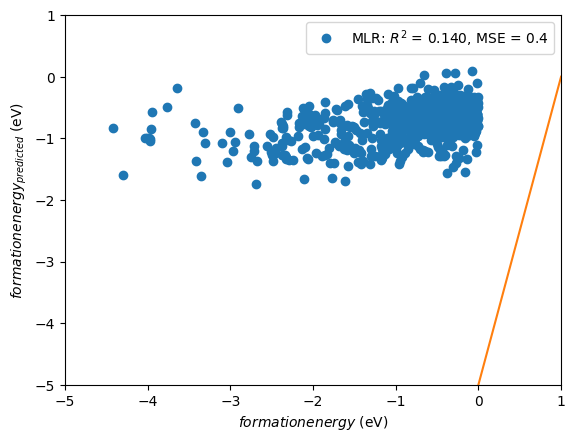

In [36]:
#linear regression for all the 4 composition averaged features (atomic density, efermi, volume, density)
#Plot data
import matplotlib.pyplot as plt
label = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2, mse)
plt.plot(y2_test, ypred2, "o", label = label)
plt.ylabel("$formation energy_{predicted}$ (eV)")
plt.xlabel("$formation energy$ (eV)")
plt.legend()
plt.xlim([-5,1])
plt.ylim([-5,1])
plt.plot([-5,0]), [-5,0], "formation energy--"

formation energy = -1.4 + 8.89e-02 efermi + 4.16e-03 atomic_density + 1.04e-04 volume + 1.79e-02 density


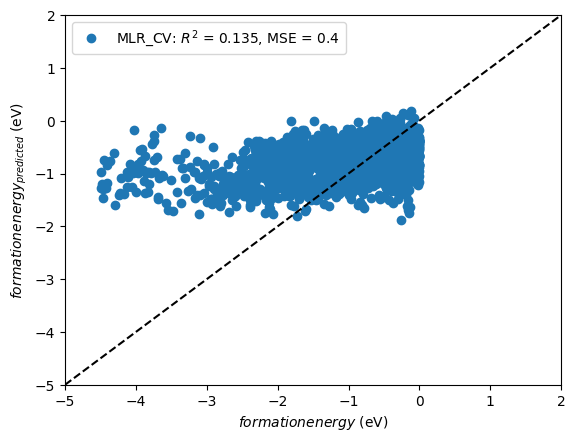

In [37]:
#linear model linear regression for atomic density, efermi, volume, density
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import r2_score

kfold = KFold(n_splits=10, shuffle=True, random_state=2) # fix random state and change it later

reg_cv = linear_model.LinearRegression()
ypred_cv2 = cross_val_predict(reg_cv, x2, y, cv=kfold)

r2_cv2 = r2_score(y, ypred_cv2)
mse_cv2 = mean_squared_error(y, ypred_cv2)
label_cv2 = "MLR_CV: $R^2$ = %.3f, MSE = %.1f" % (r2_cv2, mse_cv2)

equation = ["%.2e %s" % (v, f) for v, f in zip(reg.coef_, x2.columns)]
print("formation energy = %.1f + %s" % (reg.intercept_, " + ".join(equation)))
label = "MLR: $R^2$ = %.3f, MSE = %.1f" % (r2, mse)

plt.plot(y, ypred_cv2, "o", label=label_cv2)
plt.ylabel(r"$formation energy_{predicted}$ (eV)")
plt.xlabel(r"$formation energy$ (eV)")
plt.legend()
plt.xlim([-5, 2])
plt.ylim([-5, 2])
plt.plot([-5, 2], [-5, 2], "k--");

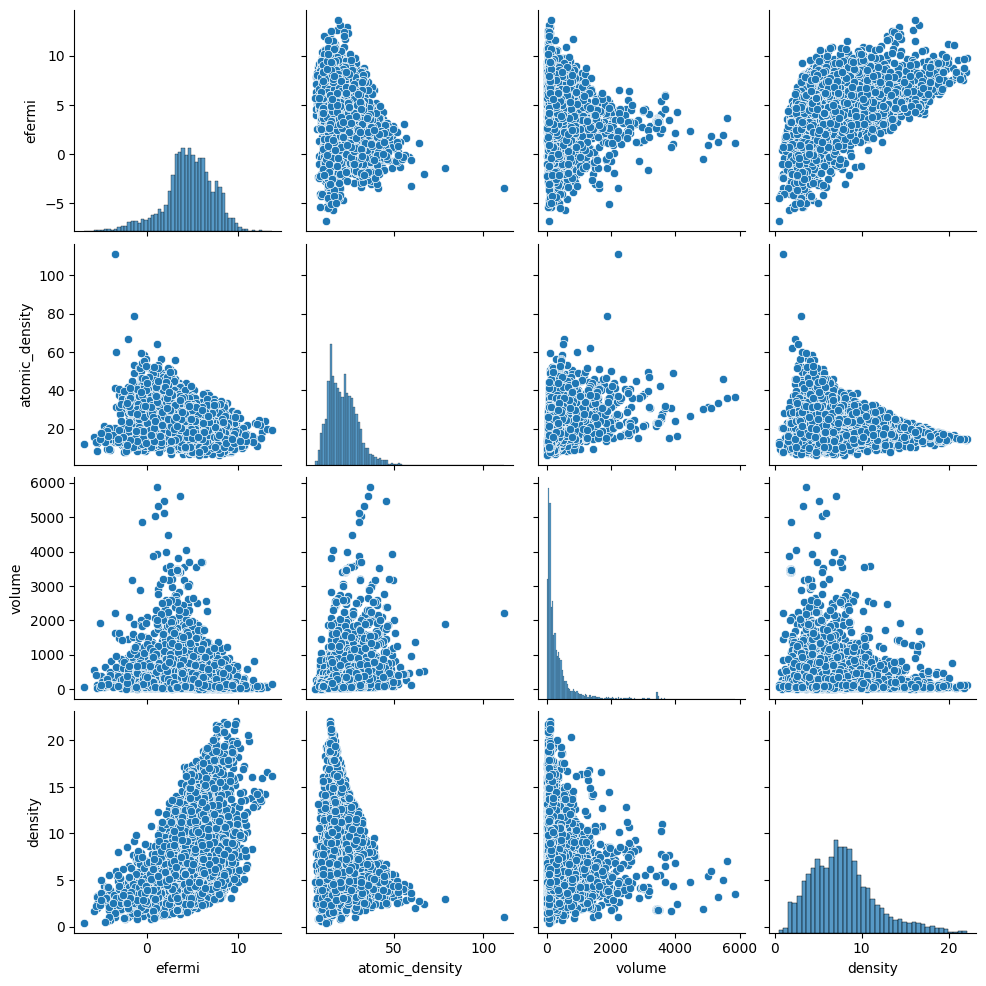

In [38]:
#pairplot for all 4 parameters previously mentioned (atomic density, efermi, volume, density)
import seaborn as sns
grid = sns.pairplot(df[x2.columns])

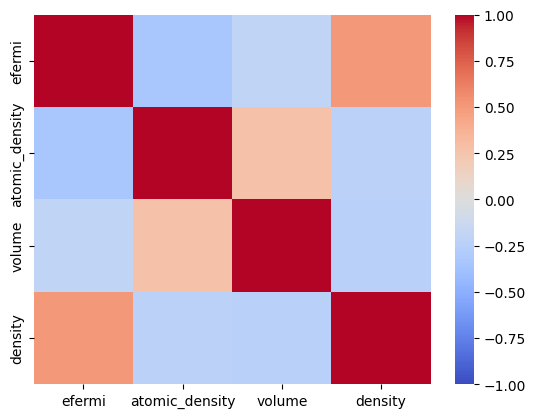

In [39]:
#heatmap for all the 4 features (atomic density, efermi, volume, density )
sns.heatmap(x2.corr(), cmap="coolwarm", vmin=-1, vmax=1);

In [125]:
x_2_2 = df.drop(["metal","Composition","density_atomic","band_gap","material_id","formula","mean simul. packing efficiency","mean abs simul. packing efficiency","dist from 1 clusters |APE| < 0.010","dist from 3 clusters |APE| < 0.010","dist from 5 clusters |APE| < 0.010"],axis=1)
x_2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10298 entries, 0 to 10297
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formation_energy  10298 non-null  float64
 1   efermi            10290 non-null  float64
 2   atomic_density    10298 non-null  float64
 3   volume            10298 non-null  float64
 4   density           10298 non-null  float64
dtypes: float64(5)
memory usage: 402.4 KB


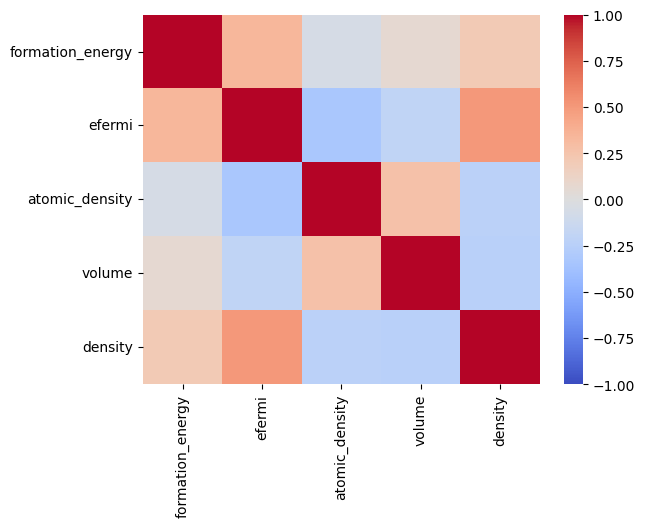

In [126]:
#heatmap showing an effect on formation energy by the 4 different features (atomic density, efermi, volume, density on formation energy)
#clearly shows efermi has the highest effect
sns.heatmap(x_2_2.corr(), cmap="coolwarm", vmin=-1, vmax=1);

In [127]:
x_2_3 = df.drop(["metal","formation_energy","Composition","density_atomic","material_id","formula","mean simul. packing efficiency","mean abs simul. packing efficiency","dist from 1 clusters |APE| < 0.010","dist from 3 clusters |APE| < 0.010","dist from 5 clusters |APE| < 0.010"],axis=1)
x_2_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10298 entries, 0 to 10297
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   band_gap        10298 non-null  float64
 1   efermi          10290 non-null  float64
 2   atomic_density  10298 non-null  float64
 3   volume          10298 non-null  float64
 4   density         10298 non-null  float64
dtypes: float64(5)
memory usage: 402.4 KB


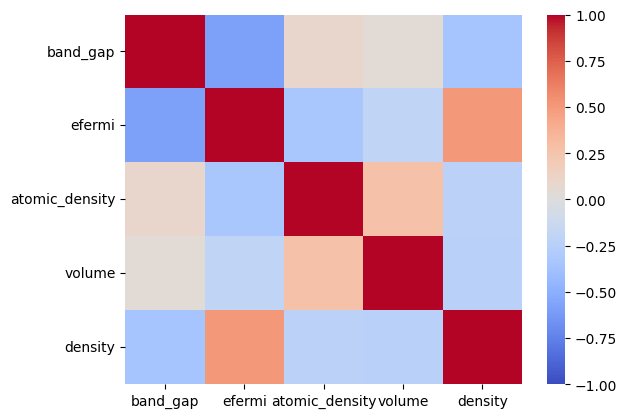

In [128]:
#heatmap showing the effect of 4 composition averagred features on bandgap (atomic density, efermi, volume, density)
#clearly shows density has the highest effect
sns.heatmap(x_2_3.corr(), cmap="coolwarm", vmin=-1, vmax=1);

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x2)
means_ = scaler.mean_
stds_ = scaler.scale_
z = scaler.transform(x2)

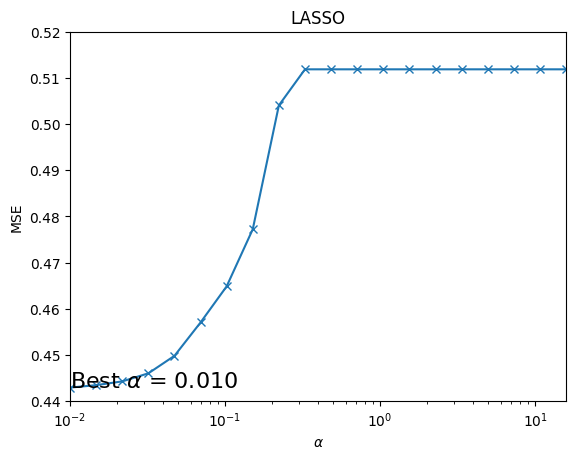

In [41]:
#LASSO regression modeling on bandgap with respect to all four features (atomic density, efermi, volume, density)
from sklearn.model_selection import cross_validate
import numpy as np

alphas = np.logspace(-2, 1.2, 20)
cv_results = []
coeffs = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=100000)
    lasso.fit(z, y)
    scores = cross_validate(lasso, z, y, cv=kfold, scoring="neg_mean_squared_error")
    cv_results.append([alpha, -np.mean(scores["test_score"])] + list(lasso.coef_))

features = ['efermi','atomic_density','volume','density']
cv_results = pd.DataFrame(cv_results, columns=["alpha", "score"] + features)
plt.plot(cv_results["alpha"], cv_results["score"], "-x")
plt.xlim([1e-2, 10**1.2])
plt.ylim((0.44, 0.52))
plt.xscale("log")
plt.xlabel(r"$\alpha$")
plt.ylabel("MSE")
plt.title("LASSO")
best_alpha = cv_results["alpha"][cv_results["score"].idxmin()]
plt.annotate(
    r"Best $\alpha$ = %.3f" % best_alpha,
    (best_alpha, cv_results["score"].min()),
    fontsize=16,
);

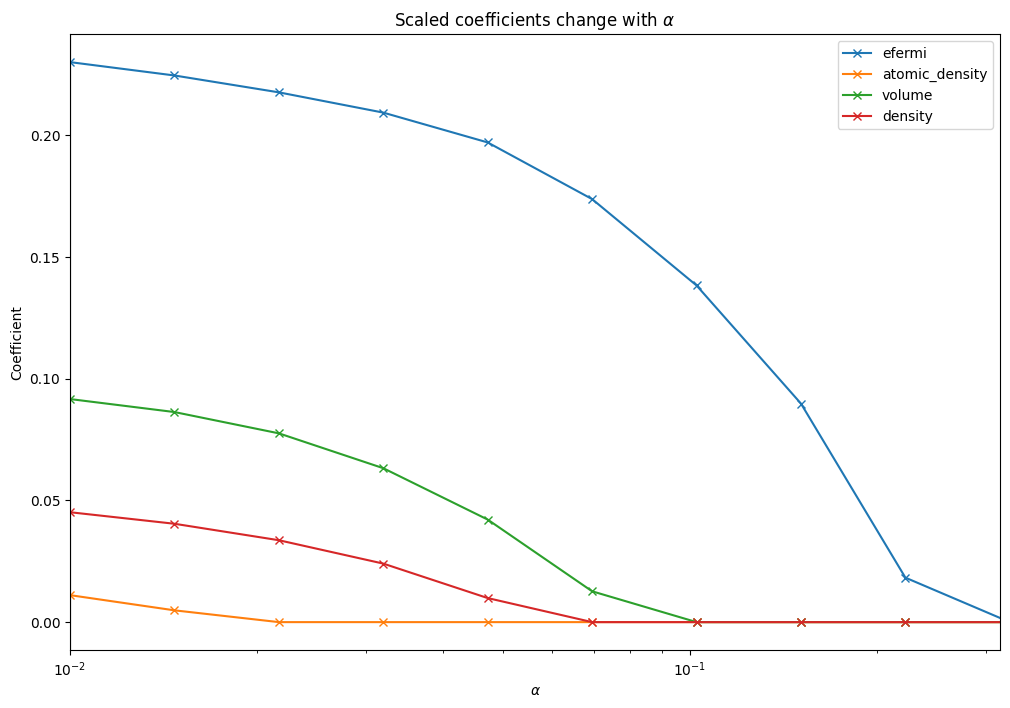

In [42]:
f, ax = plt.subplots(figsize=(12, 8))
for f in features:
    plt.plot(cv_results["alpha"], cv_results[f], "-x", label=f)
    plt.xscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Coefficient")
    plt.title(r"Scaled coefficients change with $\alpha$")
plt.legend()
plt.axvline(x = best_alpha, color = 'black')
plt.xlim([1e-2, 10**-0.5]);

In [43]:
#linear model lasso regression on bandgap with respect to the four composition averaged features (atomic density, efermi, volume, density)
reg = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
reg.fit(x2, y)

real_coef = reg.coef_ / stds_  # convert back to unnormalized inputs
real_interp = reg.intercept_ - means_.dot(real_coef)  # convert back to unnormalized inputs

equation = ["%.2e %s" % (v, f) for v, f in zip(real_coef, features) if abs(v) > 1e-4]
print("formation energy = %.1f + %s" % (real_interp, " + ".join(equation)))

formation energy = -1.5 + 3.25e-02 efermi + 3.08e-04 atomic_density + 3.90e-03 density


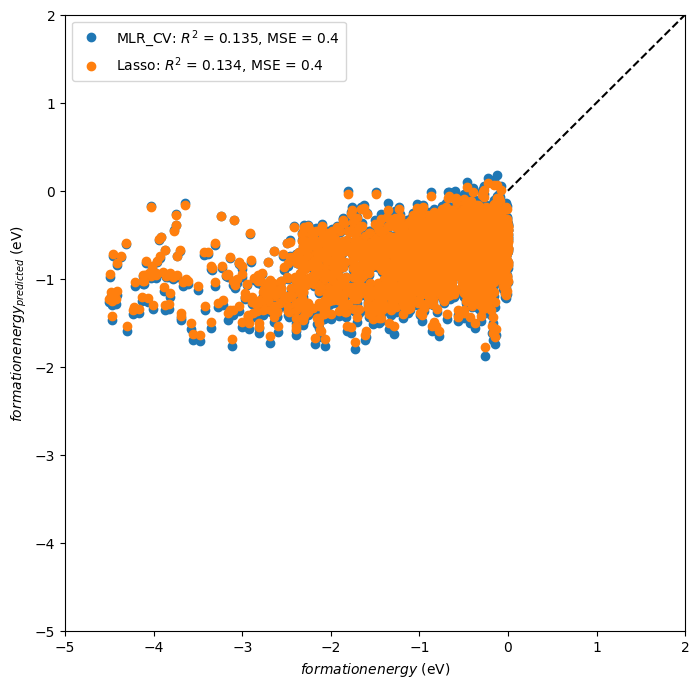

In [44]:
lasso = linear_model.Lasso(alpha=best_alpha, max_iter=10000)
ypred_lasso2 = cross_val_predict(lasso, z, y, cv=kfold)
r2_lasso2 = r2_score(y, ypred_lasso2)
mse_lasso2 = mean_squared_error(y, ypred_lasso2)
label_lasso2 = "Lasso: $R^2$ = %.3f, MSE = %.1f" % (r2_lasso2, mse_lasso2)

f, ax = plt.subplots(figsize=(8, 8))
plt.plot(y, ypred_cv2, "o", label=label_cv2)
plt.plot(y, ypred_lasso2, "o", label=label_lasso2)
l = plt.ylabel("$formation energy_{predicted}$ (eV)")
l = plt.xlabel("$formation energy$ (eV)")
plt.legend()
plt.xlim([-5, 2])
plt.ylim([-5, 2])
plt.plot([0, 5], [0, 5], "k--");

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [46]:
#decision tree classification for bandgap with respect to the four composition averaged features (atomic density, efermi, volume, density)
model = DecisionTreeRegressor(max_depth=5)
model.fit(x2_train,y2_train)

DecisionTreeRegressor(max_depth=5)

In [47]:
x2_train, x2_val, y2_train, y2_val = train_test_split(x2_train, y2_train, test_size=0.25, random_state=2, shuffle = True) #0.25 x 0.8 = 0.2
x2_val

efermi  atomic_density      volume    density
154   4.972992       12.295358   36.886075   8.127889
106   7.286684       16.540233  330.804651   8.448447
691   6.167877       13.252991   79.517945   6.342421
1650  6.230108       27.699394  249.294548   6.956160
4437  5.571971       30.962738  247.701905   7.311142
...        ...             ...         ...        ...
2988  4.589965       20.376942  285.277193  10.630861
235   6.018089       18.439343  221.272114  15.934179
3973  4.623431       18.845253   37.690506  11.976503
2536  4.307278       23.986344  383.781505   7.865295
3805  6.103483       19.390291  116.341743   6.538730

[1030 rows x 4 columns]

In [48]:
y2_pred_val=model.predict(x2_val)
mse2 = mean_squared_error(y2_val, y2_pred_val)
r2 = r2_score(y2_val, y2_pred_val)
print("Mean Squared Error VALIDATION:", mse2)
print("R-squared VALIDATION:", r2)

Mean Squared Error VALIDATION: 0.31305166897864006
R-squared VALIDATION: 0.37989582052313053


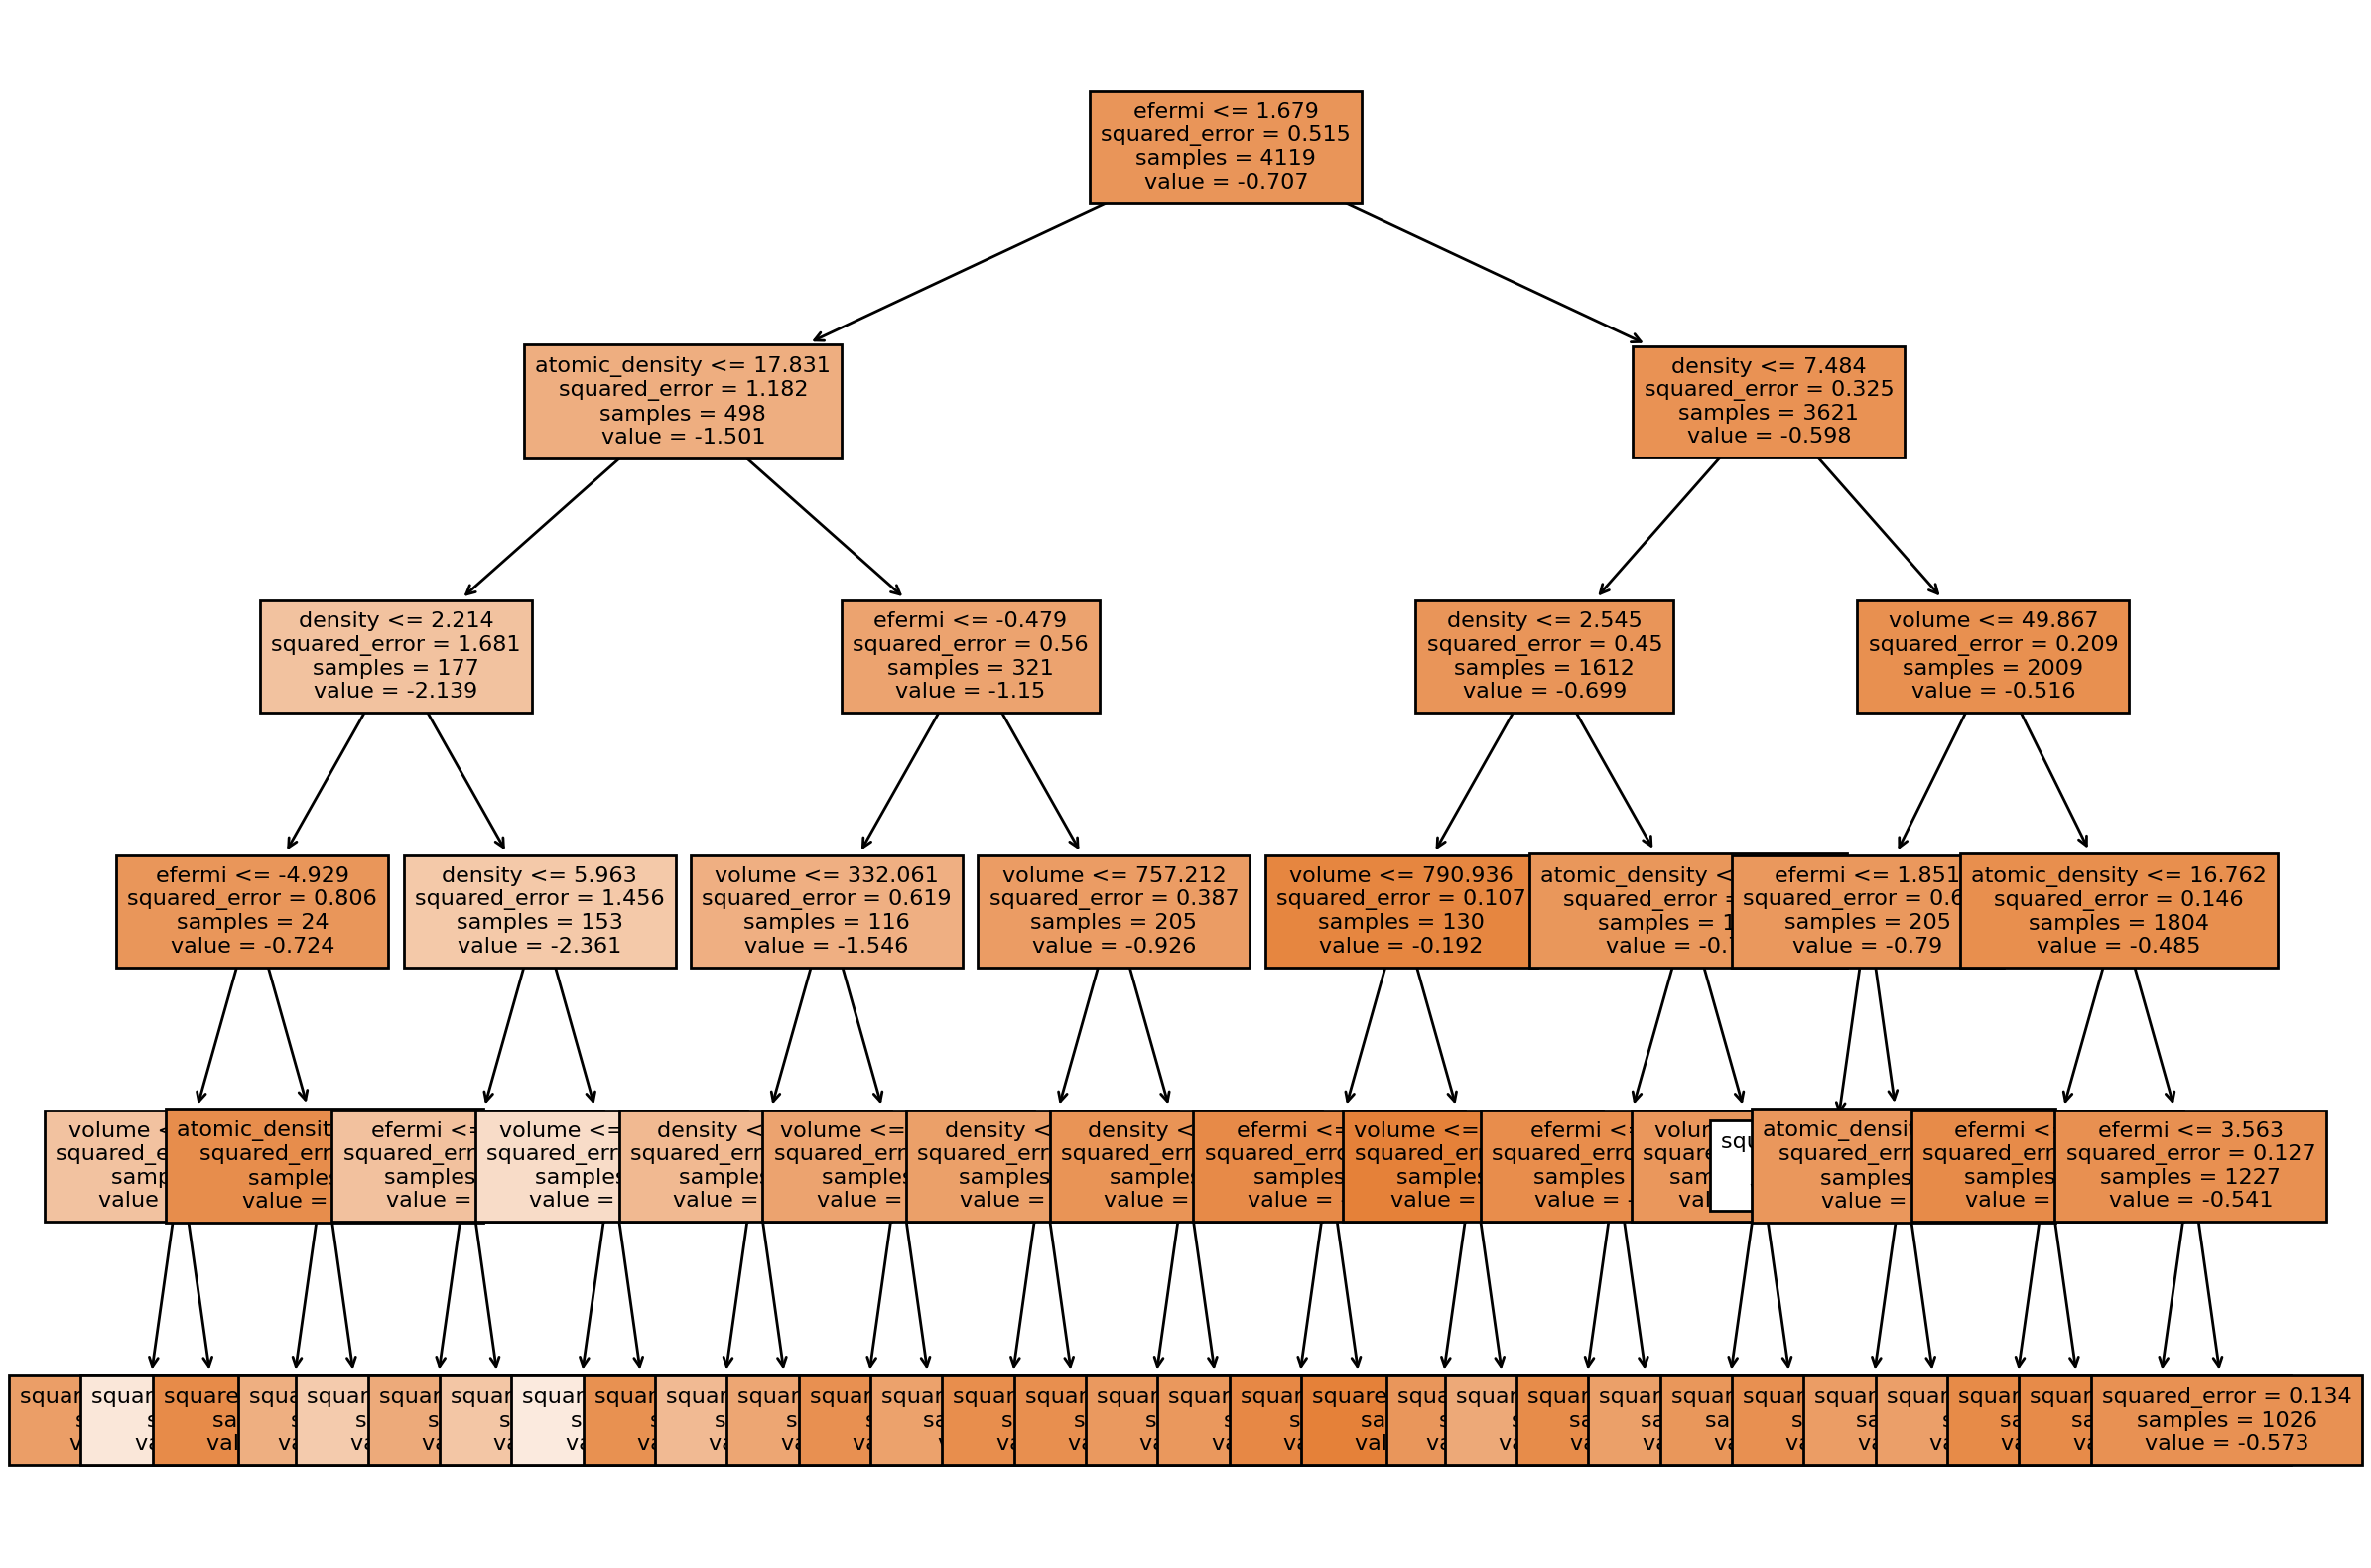

In [49]:
from sklearn import tree
plt.figure(figsize=(14,10),dpi=200)
tree.plot_tree(model, filled=True, feature_names=x2.columns,fontsize=8)
plt.show()

In [50]:
#put your code here
import numpy as np

#Defining the range of max depth values
max_depth_values = range(1,21)

#Creating lists to store MSE, MAE and R-squared values for all the split sets
mse_train_values = []
r2_train_values = []
mae_train_values = []
mse_val_values = []
r2_val_values = []
mae_val_values = []
mse_test_values = []
r2_test_values = []
mae_test_values = []

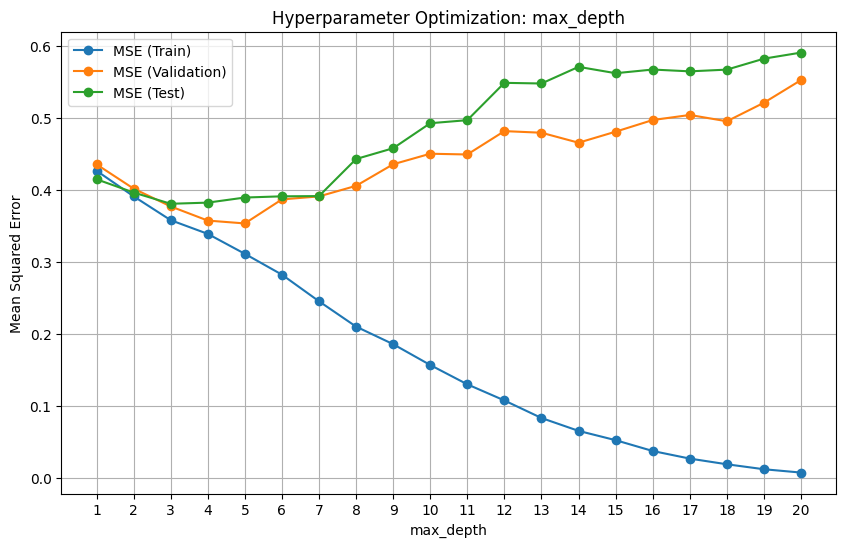

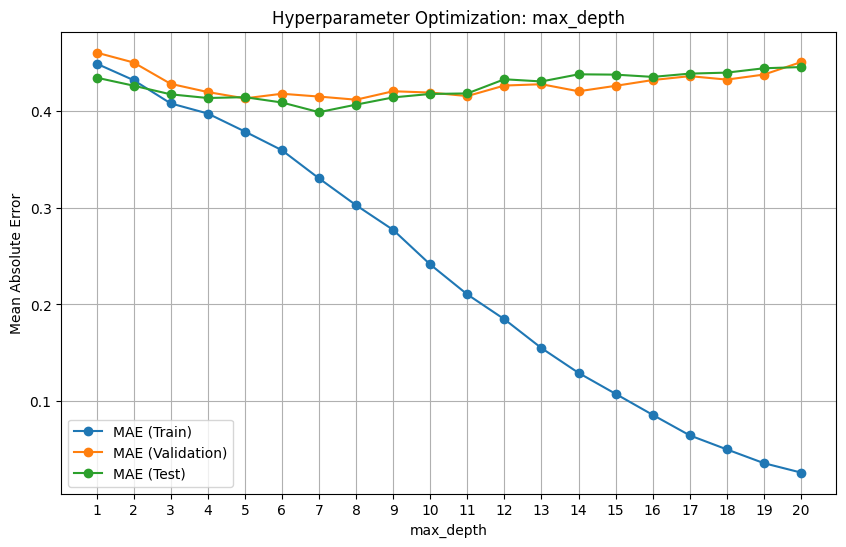

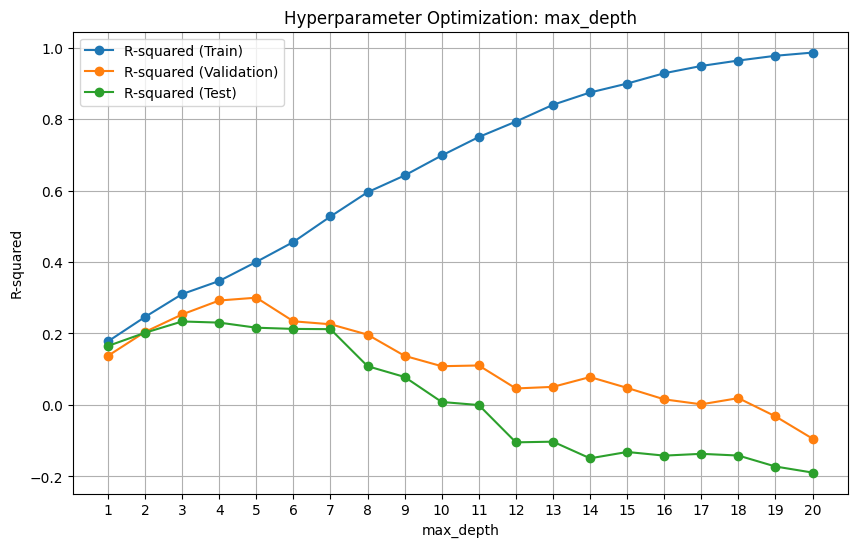

In [51]:
#Hyperparameter optimization loop for bandgap prediction with respect to the four composition averaged features (atomic density, efermi, volume, density)
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x2_train, y2_train)

    # Make predictions on the train set
    y2_train_pred = model.predict(x2_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y2_train, y2_train_pred)
    mae_train = mean_absolute_error(y2_train,y2_train_pred)
    r2_train = r2_score(y2_train, y2_train_pred)

    # Make predictions on the validation set
    y2_val_pred = model.predict(x2_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y2_val, y2_val_pred)
    mae_val = mean_absolute_error(y2_val,y2_val_pred)
    r2_val = r2_score(y2_val, y2_val_pred)

    # Make predictions on the test set
    y_test_pred = model.predict(x2_test)
    # Compute MSE and R-squared for test set
    mse_test = mean_squared_error(y2_test, y_test_pred)
    mae_test = mean_absolute_error(y2_test,y_test_pred)
    r2_test = r2_score(y2_test, y_test_pred)

    # Append the results to the lists
    mse_train_values.append(mse_train)
    mae_train_values.append(mae_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    mae_val_values.append(mae_val)
    r2_val_values.append(r2_val)
    mse_test_values.append(mse_test)
    mae_test_values.append(mae_test)
    r2_test_values.append(r2_test)

# Plotting the results
#MSE
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.plot(max_depth_values, mse_test_values, 'o-', label='MSE (Test)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

#MAE
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mae_train_values, 'o-', label='MAE (Train)')
plt.plot(max_depth_values, mae_val_values, 'o-', label='MAE (Validation)')
plt.plot(max_depth_values, mae_test_values, 'o-', label='MAE (Test)')
plt.xlabel('max_depth')
plt.ylabel('Mean Absolute Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

#R2
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.plot(max_depth_values, r2_test_values, 'o-', label='R-squared (Test)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
#The reasonable depth is chosen as 7 from the r2 vs max_depth chart.

Mean Squared Error VALIDATION: 0.3944069464641325
Mean Absolute Error VALIDATION: 0.4201180640405753
R-squared VALIDATION: 0.21874431554681784
Mean Squared Error TESTING: 0.40000743264018435
Mean Absolute Error TESTING: 0.41193154912939334
R-squared TESTING: 0.19453695638006652


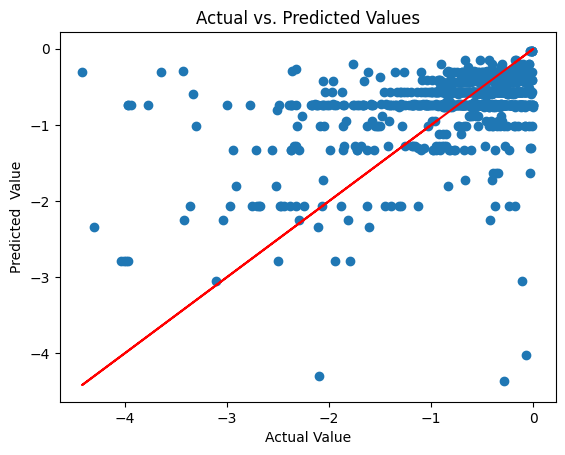

Mean Squared Error: 0.40000743264018435
Mean Absolute Error: 0.41193154912939334
R-squared: 0.19453695638006652


In [52]:
#actual vs predicted plot
#put your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
model = DecisionTreeRegressor(max_depth=6)
model.fit(x2_train, y2_train)

# Make predictions on the validation set
y_pred = model.predict(x2_val)
# Calculate evaluation metrics on the validation set
mse = mean_squared_error(y2_val, y_pred)
mae = mean_absolute_error(y2_val, y_pred)
r2 = r2_score(y2_val, y_pred)
print("Mean Squared Error VALIDATION:", mse)
print("Mean Absolute Error VALIDATION:", mae)
print("R-squared VALIDATION:", r2)

# Make predictions on the TESTING set
y_pred = model.predict(x2_test)
# Calculate evaluation metrics on the TESTING set
mse = mean_squared_error(y2_test, y_pred)
mae = mean_absolute_error(y2_test, y_pred)
r2 = r2_score(y2_test, y_pred)
print("Mean Squared Error TESTING:", mse)
print("Mean Absolute Error TESTING:", mae)
print("R-squared TESTING:", r2)

# Scatter plot of actual vs. predicted values
plt.scatter(y2_test, y_pred)
plt.plot(y2_test, y2_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
#Thus the results from decision tree model and linear regression are different. This can be seen from the actual vs predicted plot below.

Mean Squared Error TRAIN: 0.04471415888766197
Mean Absolute Error TRAIN: 0.1353974935378814
R-squared TRAIN: 0.9138139144034895


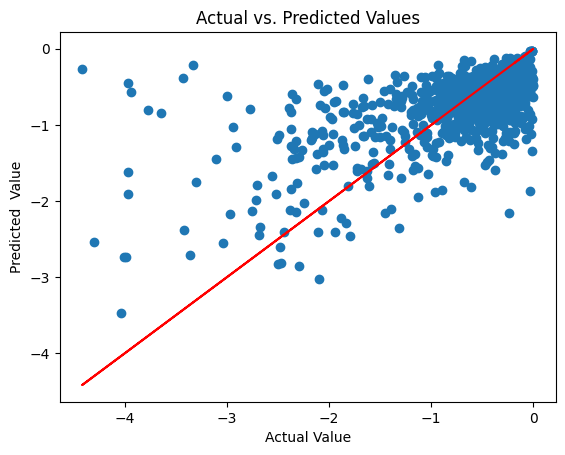

Mean Squared Error: 0.30386877195395606
Mean Absolute Error: 0.35923698805611765
R-squared: 0.38812370484313585
bootstrap = True
ccp_alpha = 0.0
criterion = squared_error
max_depth = None
max_features = 1.0
max_leaf_nodes = None
max_samples = None
min_impurity_decrease = 0.0
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
n_estimators = 100
n_jobs = None
oob_score = False
random_state = 42
verbose = 0
warm_start = False


In [53]:
#random forest regression modeling for bandgap prediction with respect to the four composition averaged features (atomic density, efermi, volume, density)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(x2_train, y2_train)

# Make predictions on the TRAIN set
y_pred = model.predict(x2_train)

# Compute MSE, MAE and R-squared
mse_train = mean_squared_error(y2_train, y_pred)
mae_train = mean_absolute_error(y2_train, y_pred)
r2_train = r2_score(y2_train, y_pred)
# Print the results
print("Mean Squared Error TRAIN:", mse_train)
print("Mean Absolute Error TRAIN:", mae_train)
print("R-squared TRAIN:", r2_train)

# Make predictions on the test set
y_pred = model.predict(x2_test)
# Scatter plot of actual vs. predicted values
plt.scatter(y2_test, y_pred)
plt.plot(y2_test, y2_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
mse_test = mean_squared_error(y2_test, y_pred)
mae_test = mean_absolute_error(y2_test, y_pred)
r2_test = r2_score(y2_test, y_pred)
# Print metrics
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

# Access the parameters of the model
params = model.get_params()
# Display the parameters
for param, value in params.items():
    print(param, "=", value)

In [54]:
#ridge regression modelling vs linear regression for bandgap with respect to atomic density, efermi, volume, density
#there is not a significant between both types of regression models
lr = LinearRegression()
lr.fit(x2_train, y2_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y2_test

train_score_lr = lr.score(x2_train, y2_train)
test_score_lr = lr.score(x2_test, y2_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = linear_model.Ridge(alpha=10)

ridgeReg.fit(x2_train,y2_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x2_train, y2_train)
test_score_ridge = ridgeReg.score(x2_test, y2_test)

The train score for lr model is 0.14497532214189413
The test score for lr model is 0.13642608702786874


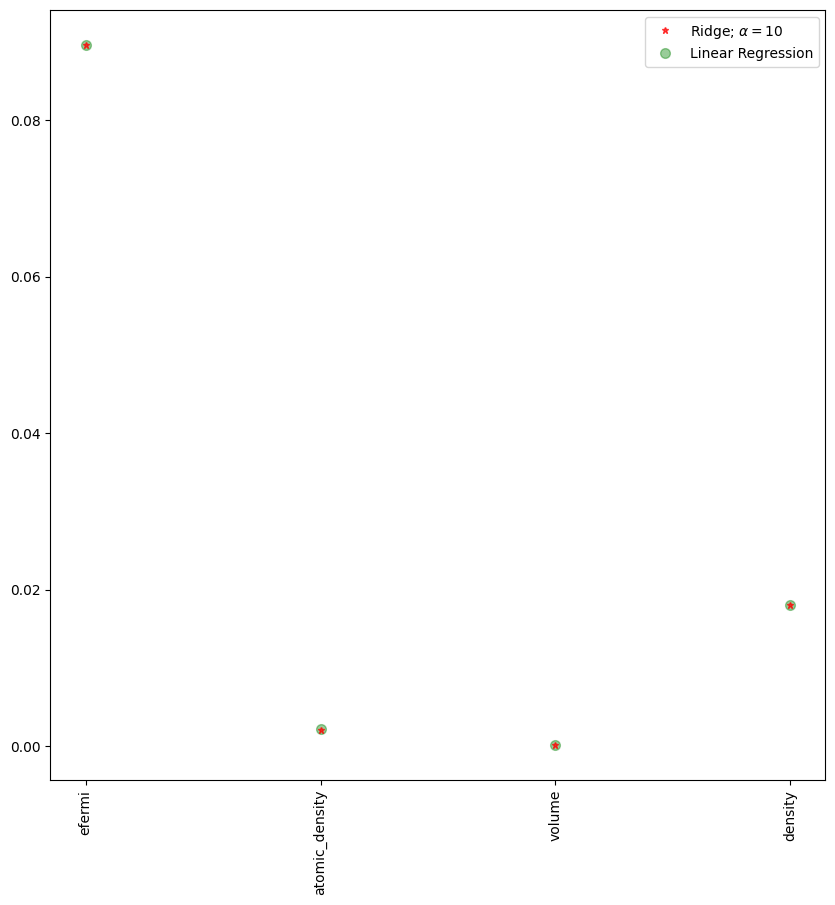

In [55]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

0.6660338854124926
0.14496332987782146
0.6548948827067316
0.1363838574083428


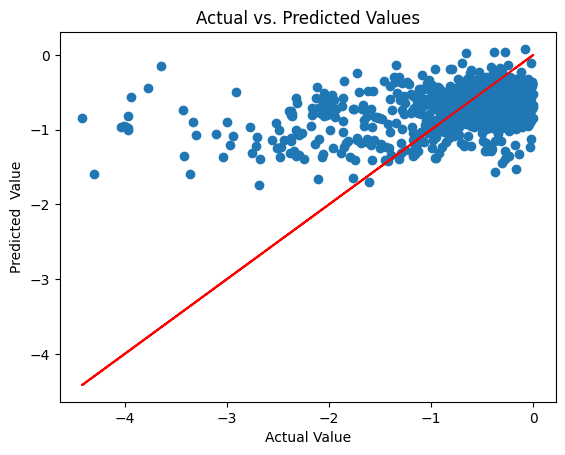

In [56]:
#Elastic Net modeling for bandgap with respect to atomic density, efermi, volume, density

from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(x2_train, y2_train)
pred_train_enet= model_enet.predict(x2_train)
print(np.sqrt(mean_squared_error(y2_train,pred_train_enet)))
print(r2_score(y2_train, pred_train_enet))

pred_test_enet= model_enet.predict(x2_test)
print(np.sqrt(mean_squared_error(y2_test,pred_test_enet)))
print(r2_score(y2_test, pred_test_enet))

# Scatter plot of actual vs. predicted values
plt.scatter(y2_test, pred_test_enet)
plt.plot(y2_test, y2_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()

In [60]:
# Saving feature names for later use
feature_list = list(x2_val.columns)
features_pandas = x2_val
feature_list_test = list(x2_test.columns)
features_pandas_test = x2_test
features = np.array(x2_val)
features_test = np.array(x2_test)

Variable: efermi                Importance: 0.38
Variable: atomic_density        Importance: 0.22
Variable: density               Importance: 0.22
Variable: volume                Importance: 0.18


<ipython-input-62-50a72cfb96a0>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn')


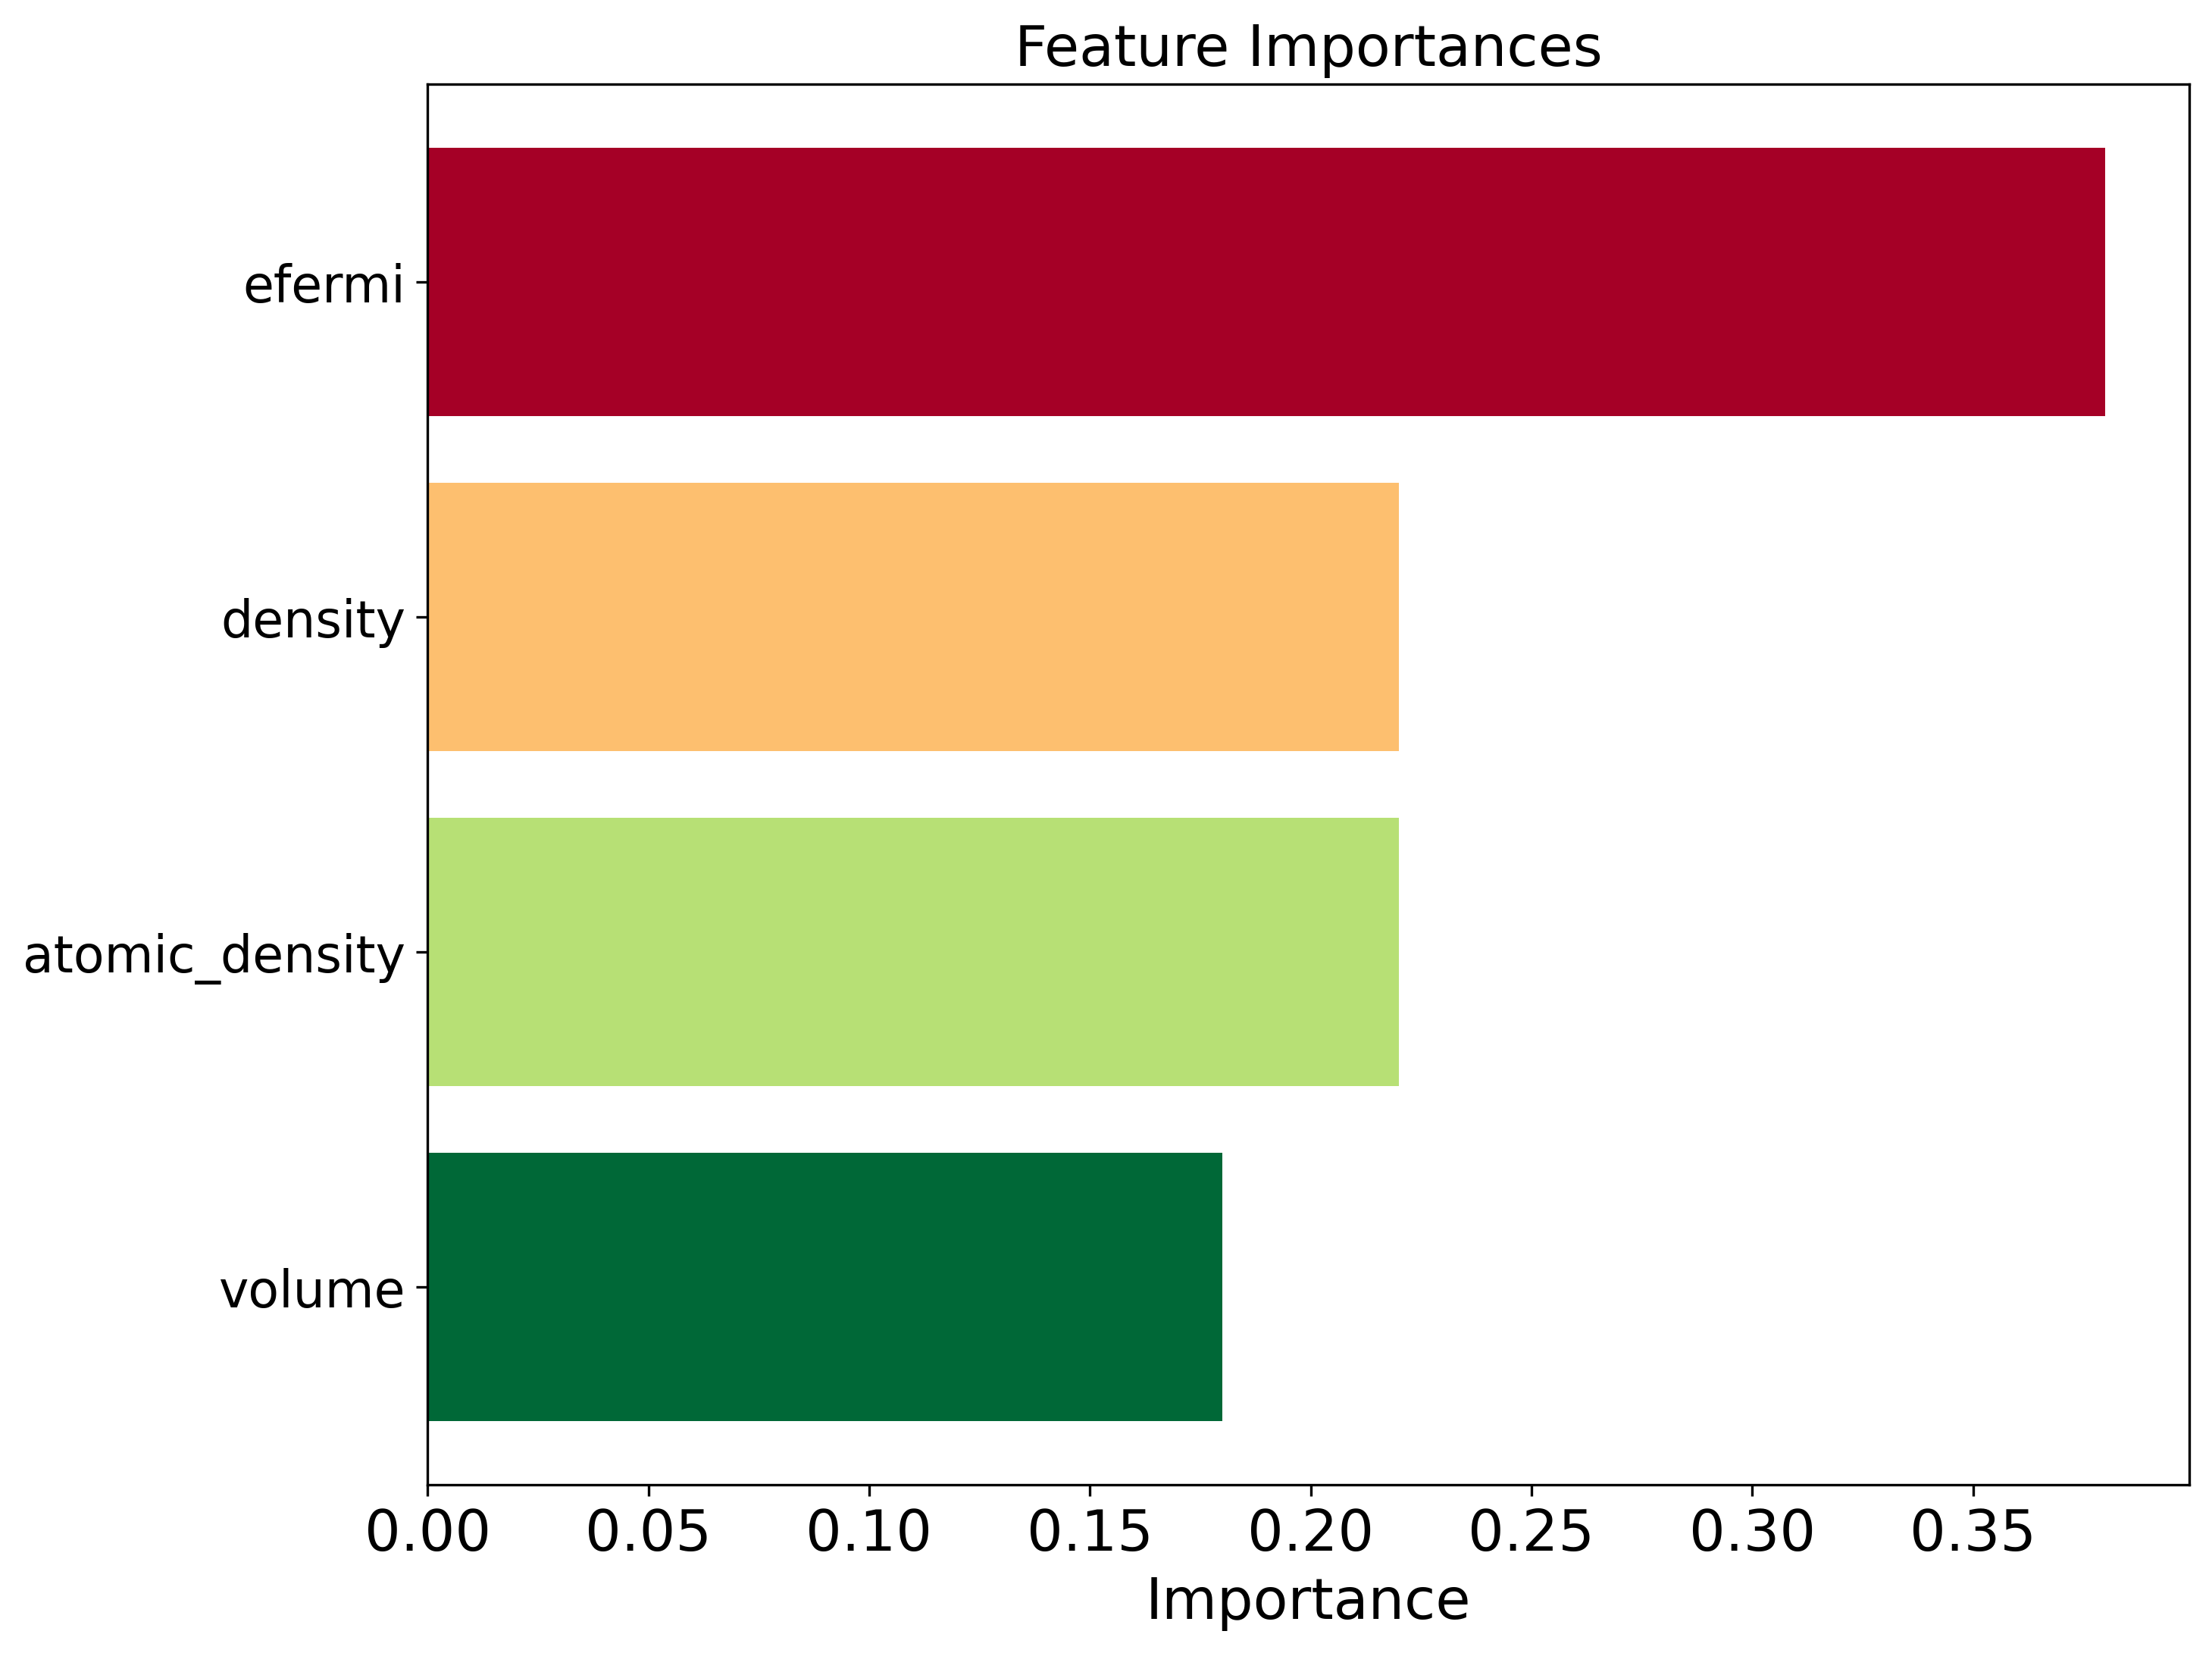

In [62]:
#feature importance prediction, it clearly says that efermi is the feature having the highest influence on bandgap while volume had the most minimal effect
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=300)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Define a colormap ranging from red (most important) to green (least important)
colormap = plt.cm.get_cmap('RdYlGn')
colors = [colormap(i) for i in np.linspace(0, 1, len(feature_importances))][::-1]

# Create a horizontal bar chart with colored bars
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center', color=colors)
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances],fontsize=16)
plt.xlabel('Importance',fontsize=18)
plt.title('Feature Importances',fontsize=18)
plt.xticks(fontsize=18)  # Add this line to adjust x-axis tick label font size
plt.show()

In [219]:
#finding the metallicity of compounds using this command
df['Is this metal'] = df['band_gap'].apply(lambda x: '0' if x < 0.001 else '1')
print(df)

      density_atomic  band_gap material_id   formula  formation_energy  \
0          22.877356    0.0978  mp-1185636   Mg149Tc         -0.018674   
1          32.273652    0.0000  mp-1223503     K5As4         -0.437151   
2          16.316454    0.0000   mp-849086      CuS2         -0.432674   
3          20.401661    0.0000  mp-1219378  Sm14Ag51         -0.246306   
4           9.856148    0.0000    mp-22266      GdB6         -0.456620   
...              ...       ...         ...       ...               ...   
5144       21.525290    0.1520      mp-408     Mg2Ge         -0.268911   
5145       13.438418    0.0000     mp-1620      Si2W         -0.345997   
5146       10.623560    1.8157  mp-1274279       FeO         -1.482156   
5147       16.443801    0.0000     mp-1518     CeRh3         -0.634512   
5148       15.707060    0.0000     mp-8073     AsPd2         -0.373166   

         efermi  atomic_density       volume    density  metal Composition  \
0      3.331855       22.877356  

In [222]:
#including all 4 features atomic density, efermi, volume, density on formation energy along with APF as mean simulation packing efficiency since it had the highest effect
x_3 = df.drop(["Is this metal","metal","formation_energy","Composition","density_atomic","band_gap","material_id","formula","mean abs simul. packing efficiency","dist from 1 clusters |APE| < 0.010","dist from 3 clusters |APE| < 0.010","dist from 5 clusters |APE| < 0.010"],axis=1)
x_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   efermi                          5145 non-null   float64
 1   atomic_density                  5149 non-null   float64
 2   volume                          5149 non-null   float64
 3   density                         5149 non-null   float64
 4   mean simul. packing efficiency  5086 non-null   float64
dtypes: float64(5)
memory usage: 201.3 KB


In [223]:
x3= x_3.fillna(0)
print(x3)

         efermi  atomic_density       volume    density  \
0      3.331855       22.877356  3431.603343   1.799824   
1      1.684900       32.273652   290.462870   2.830869   
2      6.011833       16.316454    97.898726   4.331231   
3      3.305880       20.401661  1326.107995   9.524555   
4      6.356128        9.856148    68.993035   5.345935   
...         ...             ...          ...        ...   
5144   3.300605       21.525290    64.575869   3.117889   
5145  10.164066       13.438418    40.315255   9.885778   
5146   4.160448       10.623560    84.988477   5.614899   
5147   7.900701       16.443801    65.775204  11.331077   
5148   5.608863       15.707060   188.484715  10.140650   

      mean simul. packing efficiency  
0                           0.024544  
1                           0.007185  
2                           0.027002  
3                          -0.023277  
4                          -0.001403  
...                              ...  
5144              

In [225]:
#creating y3 to predict metallicity
y3 = df['Is this metal'].values
print(y3)

['1' '0' '0' ... '1' '0' '0']


In [233]:
#removing infinity values from input x3
from numpy import inf
import numpy as np
x3[x3 == -inf] = 0
#x3.replace([np.inf, -np.inf], 0, inplace=True)

In [234]:
#training the data with metallicity included
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.2, random_state=1, shuffle = True)
x3_train

efermi  atomic_density       volume    density  \
3570  1.612945       34.074126   102.222379   4.577833   
1518  4.019616       33.532299    67.064598   7.230087   
3887  3.266111       26.118483   888.028434   3.162454   
1885  7.517304       30.851293   555.323281  11.895039   
1947  4.669209       30.002763   150.013814   5.516581   
...        ...             ...          ...        ...   
2895  6.064979       13.899682   111.197459   7.742724   
2763  0.000000       62.046099  1365.014187   1.949341   
905   2.496961       46.017569   368.140552   4.700156   
3980  4.683844       18.326192   733.047677   5.904323   
235   6.018089       18.439343   221.272114  15.934179   

      mean simul. packing efficiency  
3570                       -0.025107  
1518                       -0.009008  
3887                        0.042387  
1885                        0.023870  
1947                        0.005546  
...                              ...  
2895                        0.006301  
2763                       -0.055280  
905                        -0.013797  
3980                        0.048374  
235                        -0.003165  

[4119 rows x 5 columns]

In [235]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
reg.fit(x3_test,y3_test)
ypred3 = reg.predict(x3_test)

In [236]:
r2 = r2_score(y3_test, ypred3)
r2

0.3521089124612694

In [237]:
mse = mean_squared_error(y3_test, ypred3)
mse

0.12194997019466638

In [238]:
mae = mean_absolute_error(y3_test, ypred3)
mae

0.2799379898005964

In [240]:
#decision tree classification modeling for all the 5 features to predict metallicity
model = DecisionTreeRegressor(max_depth=5)
model.fit(x3_train,y3_train)

DecisionTreeRegressor(max_depth=5)

In [241]:
x3_train, x3_val, y3_train, y3_val = train_test_split(x3_train, y3_train, test_size=0.25, random_state=2, shuffle = True) #0.25 x 0.8 = 0.2
x3_val

efermi  atomic_density      volume    density  \
154   4.972992       12.295358   36.886075   8.127889   
106   7.286684       16.540233  330.804651   8.448447   
691   6.167877       13.252991   79.517945   6.342421   
1650  6.230108       27.699394  249.294548   6.956160   
4437  5.571971       30.962738  247.701905   7.311142   
...        ...             ...         ...        ...   
2988  4.589965       20.376942  285.277193  10.630861   
235   6.018089       18.439343  221.272114  15.934179   
3973  4.623431       18.845253   37.690506  11.976503   
2536  4.307278       23.986344  383.781505   7.865295   
3805  6.103483       19.390291  116.341743   6.538730   

      mean simul. packing efficiency  
154                         0.037590  
106                         0.014038  
691                        -0.000133  
1650                        0.000454  
4437                       -0.029181  
...                              ...  
2988                        0.006295  
235                        -0.003165  
3973                       -0.003580  
2536                       -0.002080  
3805                        0.009810  

[1030 rows x 5 columns]

In [244]:
y3_pred_val=model.predict(x3_val)
mse3 = mean_squared_error(y3_val, y3_pred_val)
r2 = r2_score(y3_val, y3_pred_val)
print("Mean Squared Error VALIDATION:", mse3)
print("R-squared VALIDATION:", r2)

Mean Squared Error VALIDATION: 0.08901996376067596
R-squared VALIDATION: 0.5033301276698738


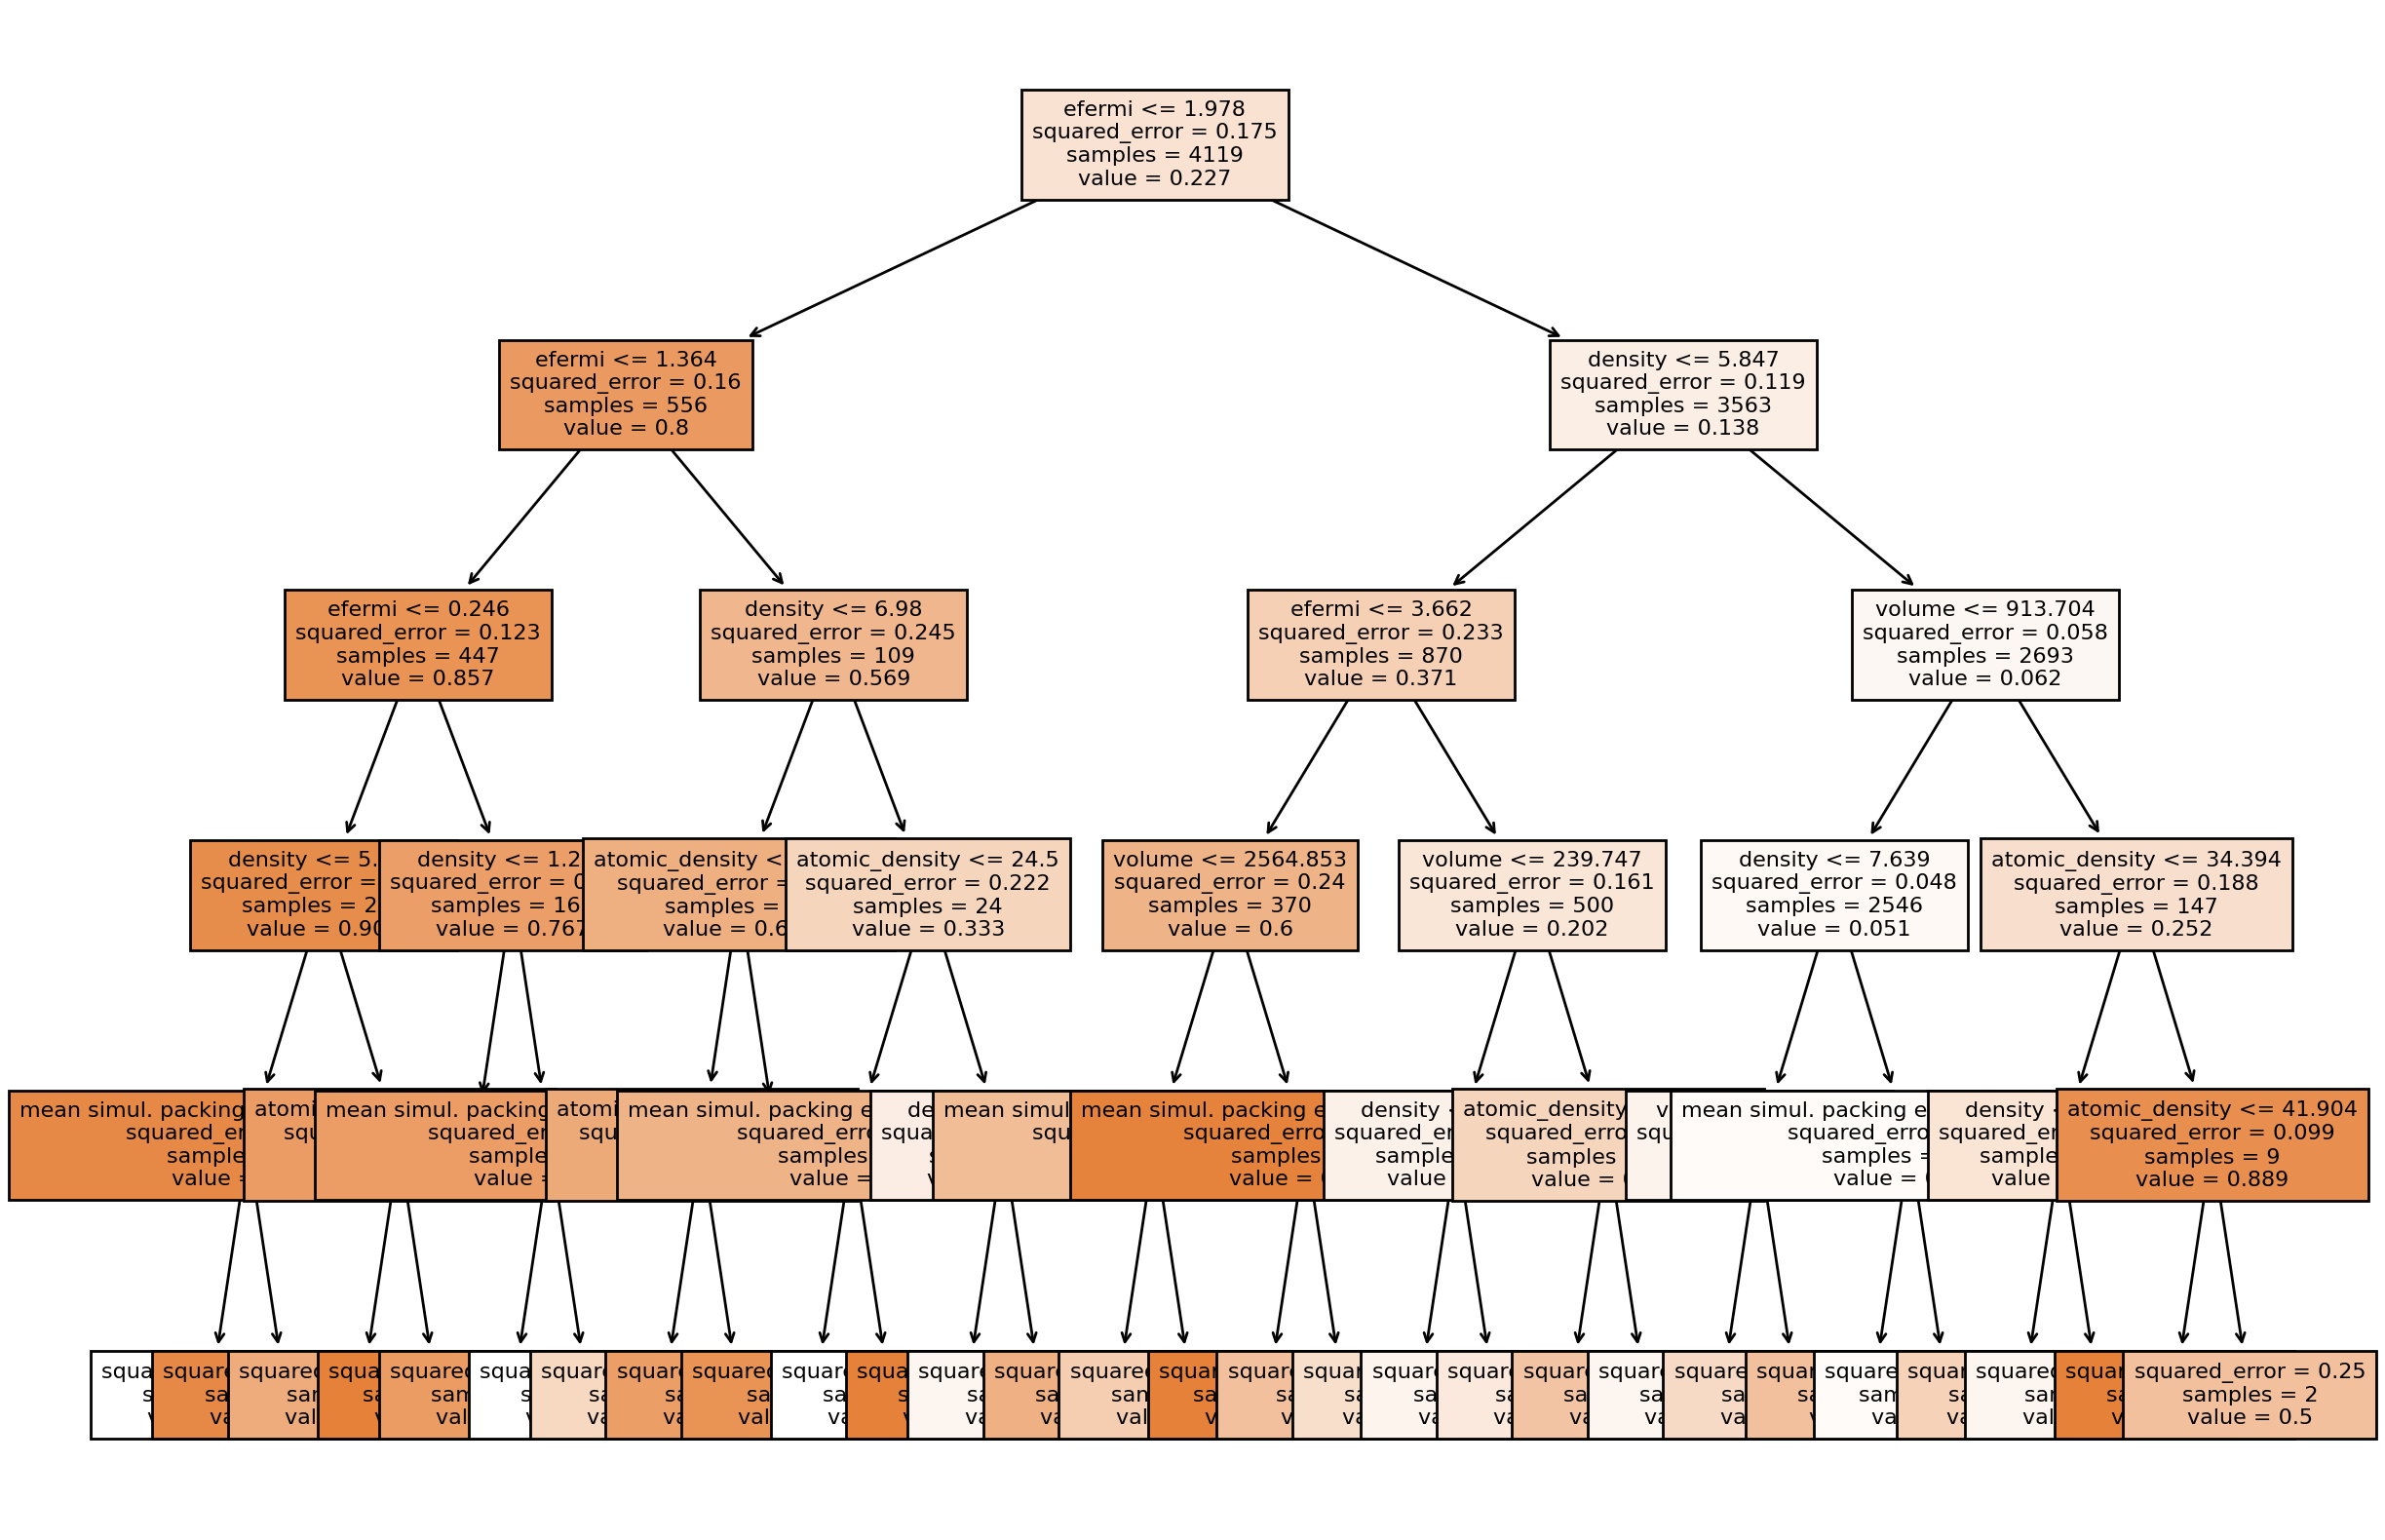

In [245]:
from sklearn import tree
plt.figure(figsize=(14,10),dpi=200)
tree.plot_tree(model, filled=True, feature_names=x3.columns,fontsize=8)
plt.show()

In [246]:
#put your code here
import numpy as np

#Defining the range of max depth values
max_depth_values = range(1,21)

#Creating lists to store MSE, MAE and R-squared values for all the split sets
mse_train_values = []
r2_train_values = []
mae_train_values = []
mse_val_values = []
r2_val_values = []
mae_val_values = []
mse_test_values = []
r2_test_values = []
mae_test_values = []

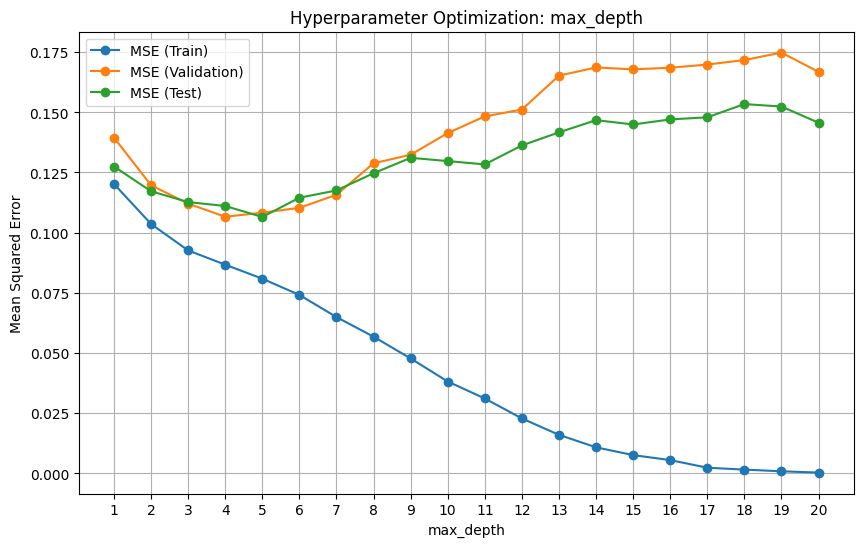

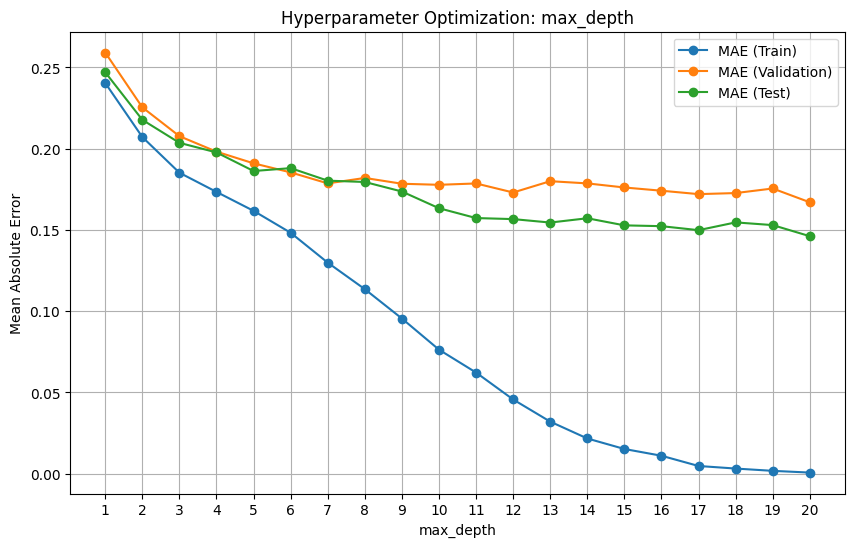

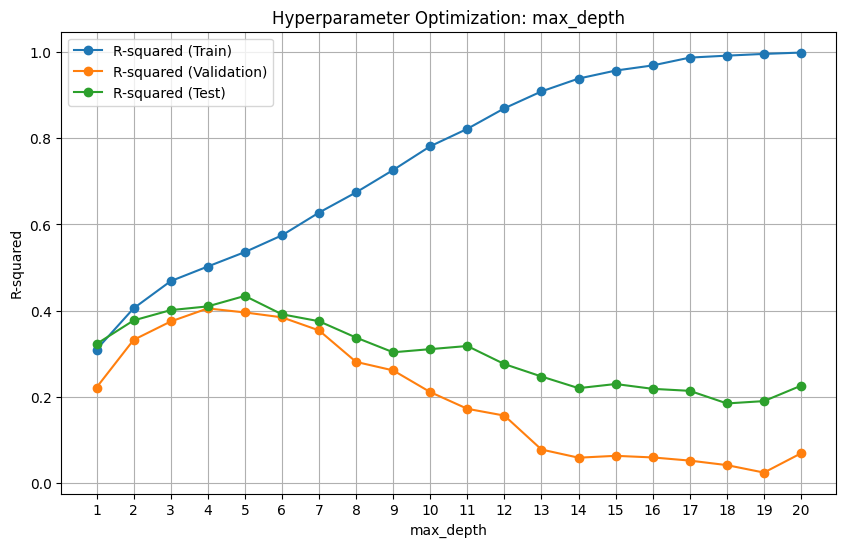

In [248]:
#Hyperparameter optimization loop for metallicity prediction
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x3_train, y3_train)

    # Make predictions on the train set
    y3_train_pred = model.predict(x3_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y3_train, y3_train_pred)
    mae_train = mean_absolute_error(y3_train,y3_train_pred)
    r2_train = r2_score(y3_train, y3_train_pred)

    # Make predictions on the validation set
    y3_val_pred = model.predict(x3_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y3_val, y3_val_pred)
    mae_val = mean_absolute_error(y3_val,y3_val_pred)
    r2_val = r2_score(y3_val, y3_val_pred)

    # Make predictions on the test set
    y3_test_pred = model.predict(x3_test)
    # Compute MSE and R-squared for test set
    mse_test = mean_squared_error(y3_test, y3_test_pred)
    mae_test = mean_absolute_error(y3_test,y3_test_pred)
    r2_test = r2_score(y3_test, y3_test_pred)

    # Append the results to the lists
    mse_train_values.append(mse_train)
    mae_train_values.append(mae_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    mae_val_values.append(mae_val)
    r2_val_values.append(r2_val)
    mse_test_values.append(mse_test)
    mae_test_values.append(mae_test)
    r2_test_values.append(r2_test)

# Plotting the results
#MSE
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.plot(max_depth_values, mse_test_values, 'o-', label='MSE (Test)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

#MAE
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mae_train_values, 'o-', label='MAE (Train)')
plt.plot(max_depth_values, mae_val_values, 'o-', label='MAE (Validation)')
plt.plot(max_depth_values, mae_test_values, 'o-', label='MAE (Test)')
plt.xlabel('max_depth')
plt.ylabel('Mean Absolute Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

#R2
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.plot(max_depth_values, r2_test_values, 'o-', label='R-squared (Test)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
#The reasonable depth is chosen as 7 from the r2 vs max_depth chart.

Mean Squared Error VALIDATION: 0.11225436867306521
Mean Absolute Error VALIDATION: 0.18734064537658093
R-squared VALIDATION: 0.37369820653669017
Mean Squared Error TESTING: 0.11451795096948382
Mean Absolute Error TESTING: 0.18801891175401578
R-squared TESTING: 0.3967306843996631


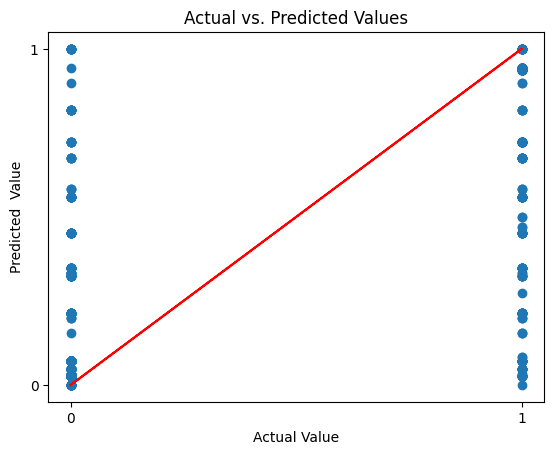

Mean Squared Error: 0.11451795096948382
Mean Absolute Error: 0.18801891175401578
R-squared: 0.3967306843996631


In [250]:
#actual vs predicted
#put your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
model = DecisionTreeRegressor(max_depth=6)
model.fit(x3_train, y3_train)

# Make predictions on the validation set
y_pred = model.predict(x3_val)
# Calculate evaluation metrics on the validation set
mse = mean_squared_error(y3_val, y_pred)
mae = mean_absolute_error(y3_val, y_pred)
r2 = r2_score(y3_val, y_pred)
print("Mean Squared Error VALIDATION:", mse)
print("Mean Absolute Error VALIDATION:", mae)
print("R-squared VALIDATION:", r2)

# Make predictions on the TESTING set
y_pred = model.predict(x3_test)
# Calculate evaluation metrics on the TESTING set
mse = mean_squared_error(y3_test, y_pred)
mae = mean_absolute_error(y3_test, y_pred)
r2 = r2_score(y3_test, y3_pred)
print("Mean Squared Error TESTING:", mse)
print("Mean Absolute Error TESTING:", mae)
print("R-squared TESTING:", r2)

# Scatter plot of actual vs. predicted values
plt.scatter(y3_test, y3_pred)
plt.plot(y3_test, y3_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
# Print metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
#Thus the results from decision tree model and linear regression are different. Thus can be seen from the actual vs predicted plot below.

Mean Squared Error TRAIN: 0.0123820977662674
Mean Absolute Error TRAIN: 0.06289090320492069
R-squared TRAIN: 0.9289171131620271


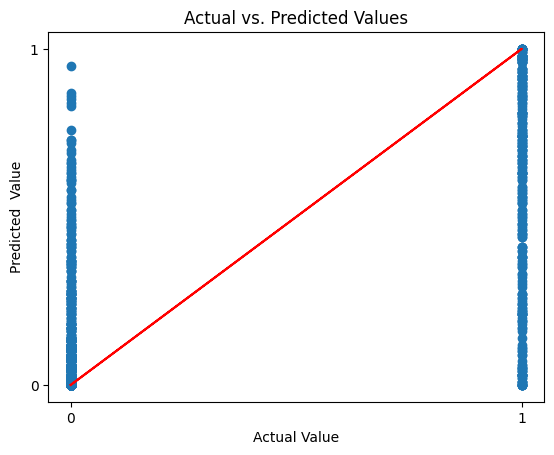

Mean Squared Error: 0.09810631067961165
Mean Absolute Error: 0.17855339805825246
R-squared: 0.4787845850297212
bootstrap = True
ccp_alpha = 0.0
criterion = squared_error
max_depth = None
max_features = 1.0
max_leaf_nodes = None
max_samples = None
min_impurity_decrease = 0.0
min_samples_leaf = 1
min_samples_split = 2
min_weight_fraction_leaf = 0.0
n_estimators = 100
n_jobs = None
oob_score = False
random_state = 42
verbose = 0
warm_start = False


In [251]:
#random forest regression classification modeling for all 4 features
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(x3_train, y3_train)

# Make predictions on the TRAIN set
y3_pred = model.predict(x3_train)

# Compute MSE, MAE and R-squared
mse_train = mean_squared_error(y3_train, y3_pred)
mae_train = mean_absolute_error(y3_train, y3_pred)
r2_train = r2_score(y3_train, y3_pred)
# Print the results
print("Mean Squared Error TRAIN:", mse_train)
print("Mean Absolute Error TRAIN:", mae_train)
print("R-squared TRAIN:", r2_train)

# Make predictions on the test set
y_pred = model.predict(x3_test)
# Scatter plot of actual vs. predicted values
plt.scatter(y3_test, y_pred)
plt.plot(y3_test, y3_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
mse_test = mean_squared_error(y3_test, y_pred)
mae_test = mean_absolute_error(y3_test, y_pred)
r2_test = r2_score(y3_test, y_pred)
# Print metrics
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

# Access the parameters of the model
params = model.get_params()
# Display the parameters
for param, value in params.items():
    print(param, "=", value)

In [252]:
# Saving feature names for later use
feature_list = list(x3_val.columns)
features_pandas = x3_val
feature_list_test = list(x3_test.columns)
features_pandas_test = x3_test
features = np.array(x3_val)
features_test = np.array(x3_test)

Variable: efermi                Importance: 0.47
Variable: density               Importance: 0.19
Variable: volume                Importance: 0.13
Variable: atomic_density        Importance: 0.11
Variable: mean simul. packing efficiency Importance: 0.1


<ipython-input-253-15b89261eba9>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('RdYlGn')


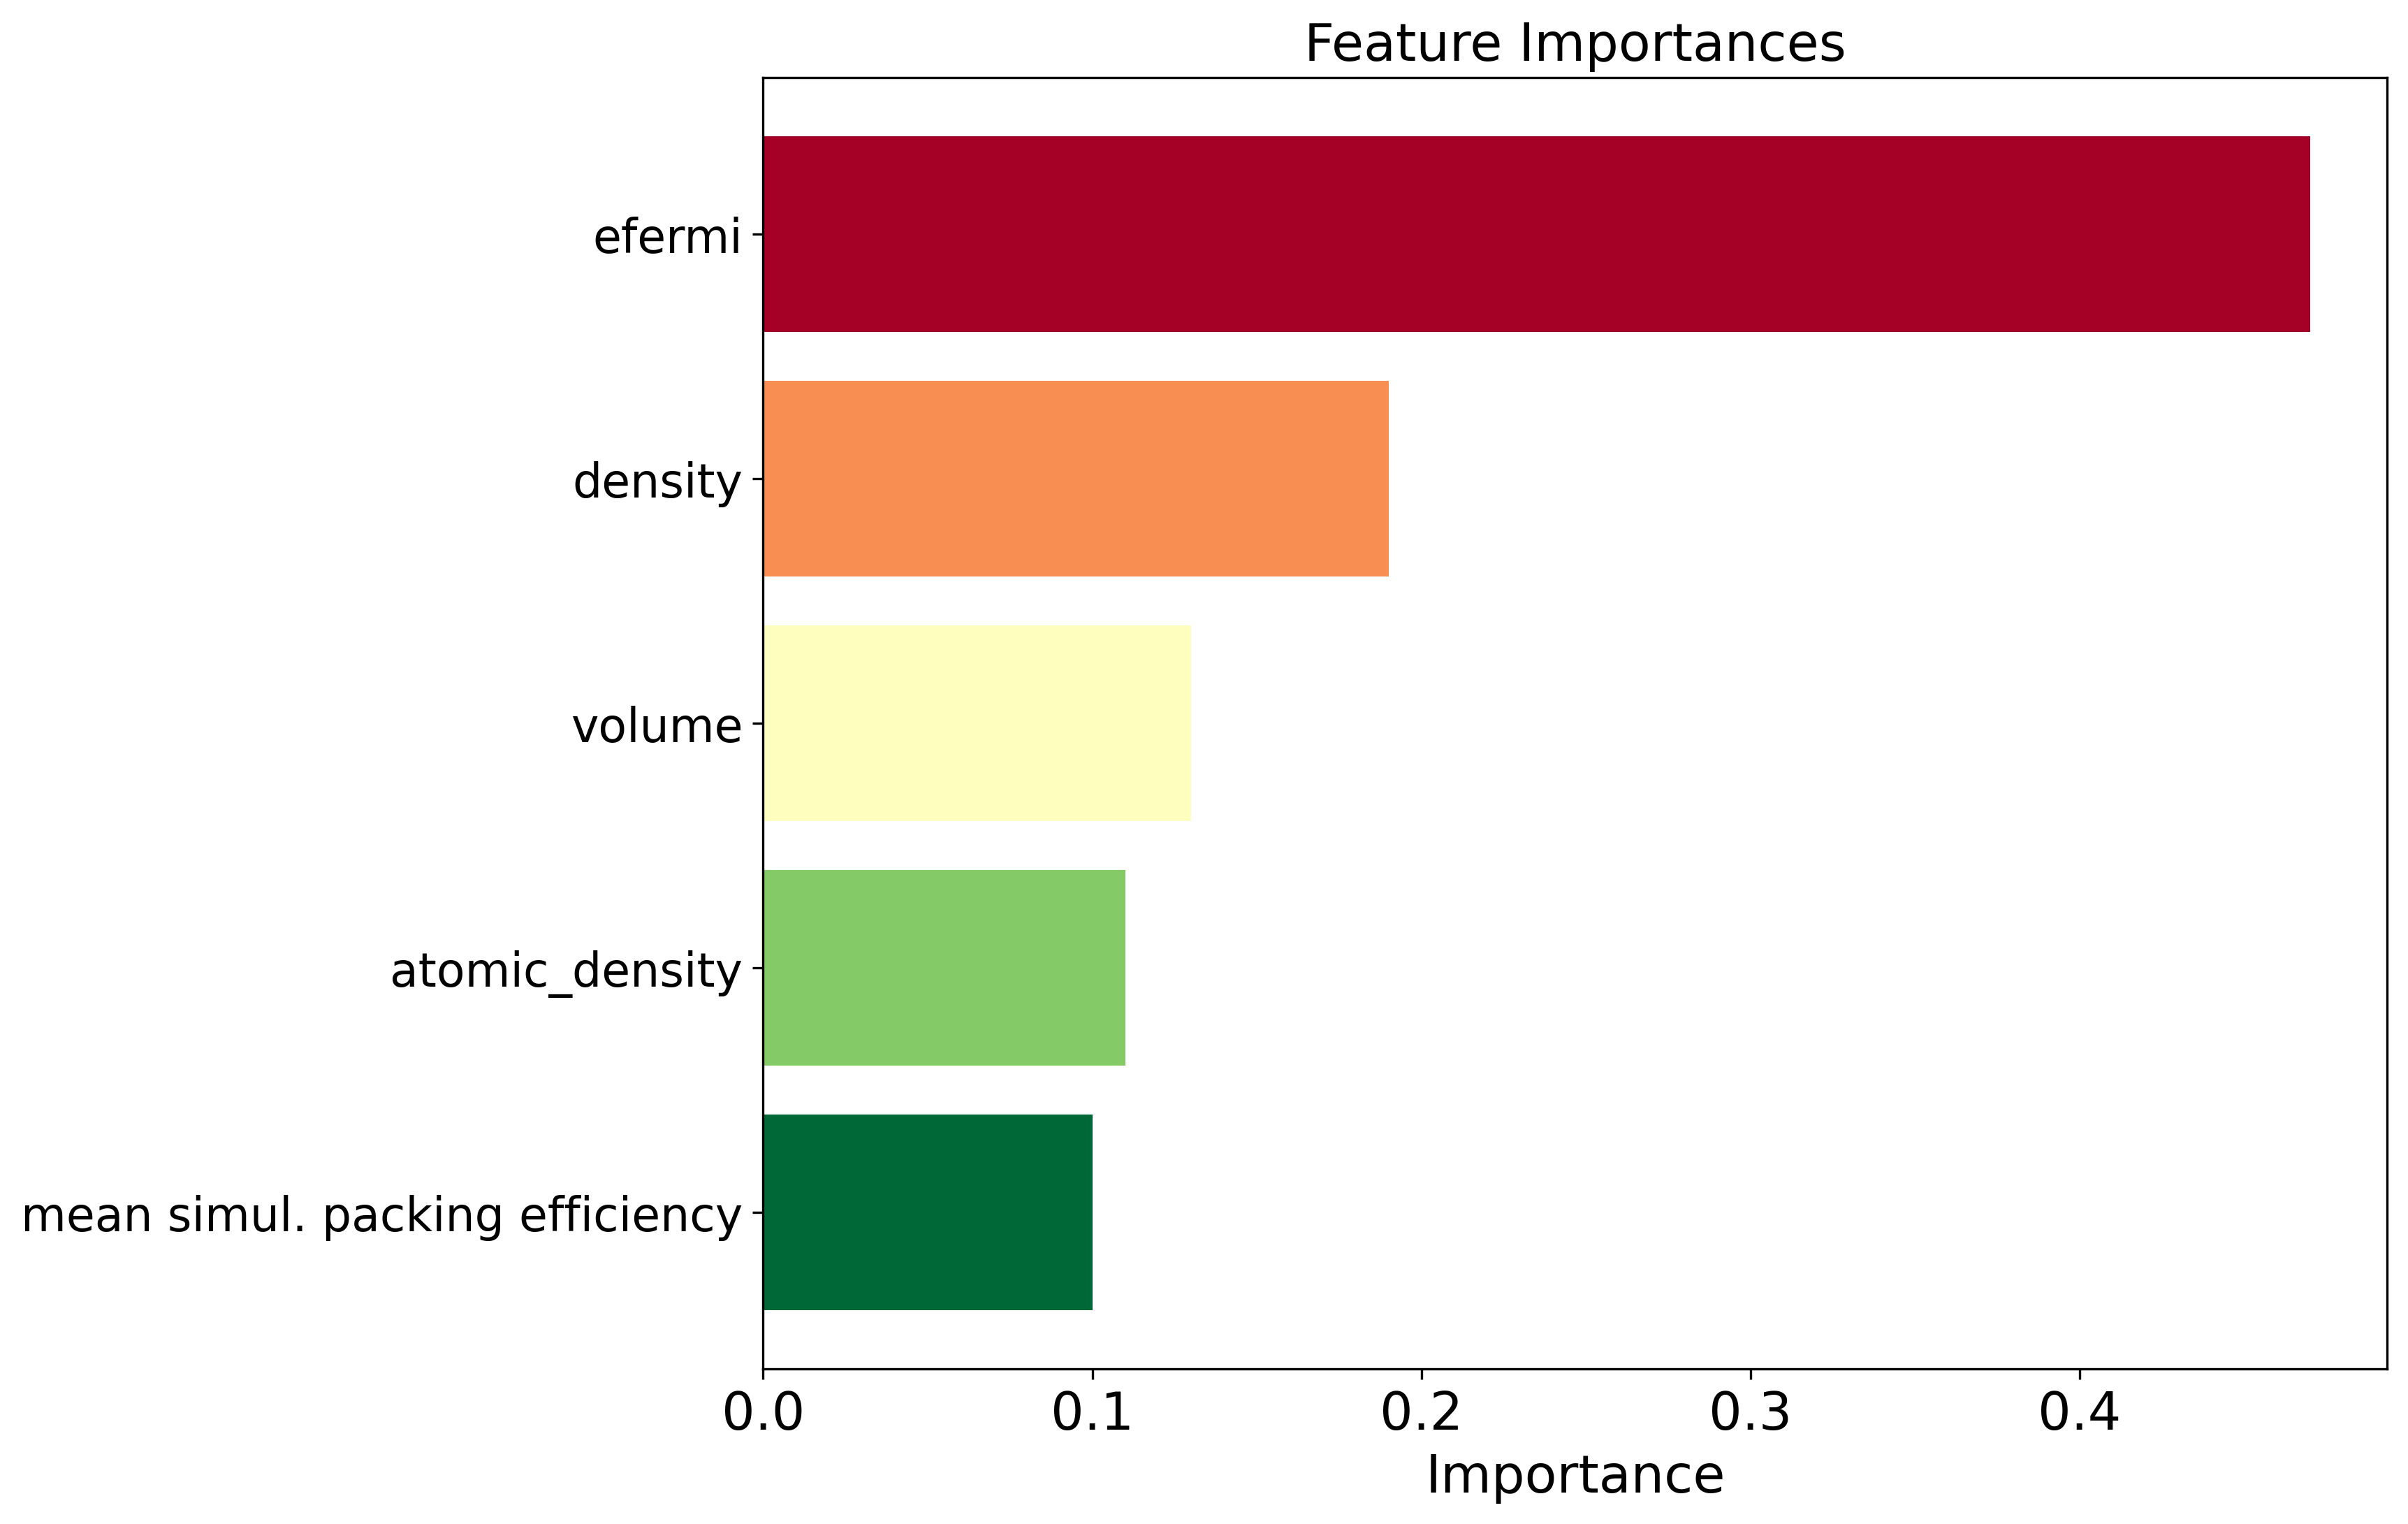

In [253]:
#feature importance effect on the 4 features along with (metal - true or false)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8), dpi=300)

# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:21} Importance: {}'.format(*pair)) for pair in feature_importances];
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)

# Define a colormap ranging from red (most important) to green (least important)
colormap = plt.cm.get_cmap('RdYlGn')
colors = [colormap(i) for i in np.linspace(0, 1, len(feature_importances))][::-1]

# Create a horizontal bar chart with colored bars
plt.barh(range(len(feature_importances)), [val[1] for val in feature_importances], align='center', color=colors)
plt.yticks(range(len(feature_importances)), [val[0] for val in feature_importances],fontsize=16)
plt.xlabel('Importance',fontsize=18)
plt.title('Feature Importances',fontsize=18)
plt.xticks(fontsize=18)  # Add this line to adjust x-axis tick label font size
plt.show()
#Thus, efermi has the most effect on metallicity and mean simulation APF had the most minimum effect

In [138]:
#optimal number of hidden layers for APF features
import pandas as pd
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [178]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   efermi          5149 non-null   float64
 1   atomic_density  5149 non-null   float64
 2   volume          5149 non-null   float64
 3   density         5149 non-null   float64
dtypes: float64(4)
memory usage: 161.0 KB


In [177]:
print(y)

[-0.01867447 -0.43715077 -0.43267424 ... -1.48215553 -0.63451218
 -0.37316584]


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [159]:
print(x1_test.shape)
print(x1_train.shape)

(1030, 5)
(4119, 5)


In [67]:
print(x1_train.isna().any())

mean simul. packing efficiency        False
mean abs simul. packing efficiency    False
dist from 1 clusters |APE| < 0.010    False
dist from 3 clusters |APE| < 0.010    False
dist from 5 clusters |APE| < 0.010    False
dtype: bool


In [88]:
x1_test.head()

mean simul. packing efficiency  mean abs simul. packing efficiency  \
1141                        0.029234                            0.029234   
2119                       -0.000663                            0.004174   
4016                       -0.012328                            0.012328   
1989                       -0.027389                            0.027389   
4871                       -0.005783                            0.020721   

      dist from 1 clusters |APE| < 0.010  dist from 3 clusters |APE| < 0.010  \
1141                            0.062392                            0.149728   
2119                            0.088388                            0.123139   
4016                            0.078567                            0.132960   
1989                            0.095321                            0.169267   
4871                            0.023570                            0.118300   

      dist from 5 clusters |APE| < 0.010  
1141                            0.187485  
2119                            0.173710  
4016                            0.222861  
1989                            0.207022  
4871                            0.197249

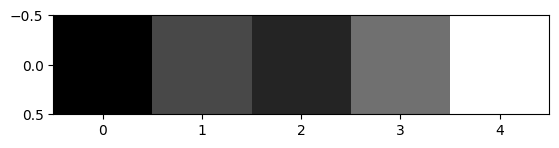

In [95]:
top_image = x1_test.iloc[21,0:]
top_image = np.array(top_image, dtype='float')
pixels = top_image.reshape((1, 5))
plt.imshow(pixels, cmap='gray')
plt.show()
#the image is shown below

In [148]:
x10_test = x1_test.to_numpy()

In [149]:
x10_train = x1_train.to_numpy()

In [143]:
y=y.astype('int')

In [147]:
y10_test = np.asarray(y1_test)
y10_test

array([ 0, -1,  0, ...,  0,  0,  0])

In [145]:
y10_train = np.asarray(y1_train)
y10_train

array([-1,  0,  0, ..., -1, -3,  0])

In [140]:
from sklearn.neural_network import MLPClassifier # multi-layer perceptron classifier, a class of neural networks
model = MLPClassifier(hidden_layer_sizes=(35,35))

In [150]:
model.fit(x10_train, y10_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(35, 35))

In [151]:
y10_train_pred = model.predict(x10_train)
y10_test_pred = model.predict(x10_test)

In [212]:
print(accuracy_score(y10_train, y10_train_pred))
print(accuracy_score(y10_test, y10_test_pred))
#the accuracy rate is at 80% for (35,35) number of hidden layers. This is the best %. Either decreasing or increasing the number of hidden layers
#decreases the accuracy rate. Therefore, this is the optimal number of hidden layers.

0.7967953386744355
0.8067961165048544


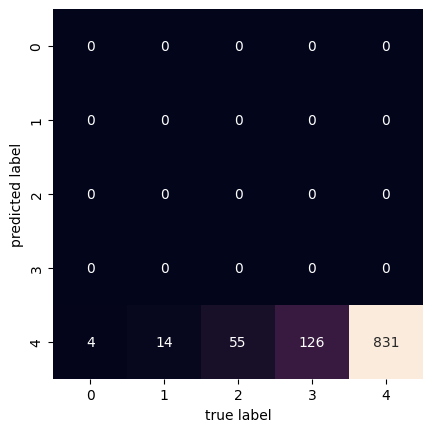

In [153]:
mat = confusion_matrix(y10_test, y10_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

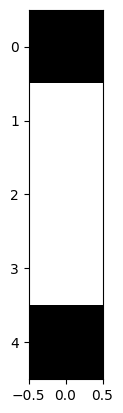

In [155]:
# Read my image in
import cv2
img = cv2.imread('Line.png', 0) # load grayscale image. Shape (28,28)
#img = cv2.blur(img, (3, 3))

#print(img)
# Plotting an image
pixels = img.reshape((1, 5))
plt.imshow(img, cmap='gray')
#plt.imshow(~img, cmap='gray')
plt.show()
#flattened = img.flatten() # flatten the image, new shape (1,)

In [157]:
my_number = img.reshape((1, -1)) # make a string
my_number

array([[  0, 255, 255, 255,   0]], dtype=uint8)

In [161]:
model.predict(my_number)

array([0])

In [179]:
#optimal number of hidden layers for 4 features of composition-averaged ones
print(x2_test.shape)
print(x2_train.shape)

(1030, 4)
(4119, 4)


In [181]:
print(x2_train.isna().any())

efermi            False
atomic_density    False
volume            False
density           False
dtype: bool


In [182]:
x2_test.head()

efermi  atomic_density      volume    density
1141  5.707757       17.534313   70.137251  17.579155
2119  4.971117       21.540251  172.322007  13.876761
4016  7.083047       15.980678  575.304407   6.117884
1989  6.208426       20.053414  962.563885  10.487476
4871  0.535061       32.069276   96.207829   3.226482

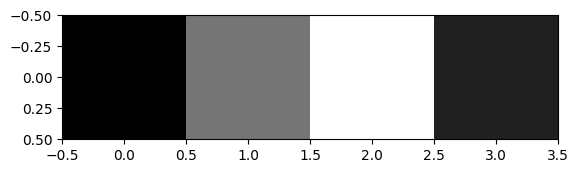

In [183]:
#the image is shown below
top_image = x2_test.iloc[21,0:]
top_image = np.array(top_image, dtype='float')
pixels = top_image.reshape((1, 4))
plt.imshow(pixels, cmap='gray')
plt.show()

In [184]:
x20_test = x2_test.to_numpy()

In [185]:
x20_train = x2_train.to_numpy()

In [186]:
y=y.astype('int')

In [187]:
y20_test = np.asarray(y2_test)
y20_test

array([ 0, -1,  0, ...,  0,  0,  0])

In [188]:
y20_train = np.asarray(y2_train)
y20_train

array([-1,  0,  0, ..., -1, -3,  0])

In [202]:
from sklearn.neural_network import MLPClassifier # multi-layer perceptron classifier, a class of neural networks
model = MLPClassifier(hidden_layer_sizes=(45,45))

In [203]:
model.fit(x20_train, y20_train)

MLPClassifier(hidden_layer_sizes=(45, 45))

In [204]:
y20_train_pred = model.predict(x20_train)
y20_test_pred = model.predict(x20_test)

In [205]:
print(accuracy_score(y20_train, y20_train_pred))
print(accuracy_score(y20_test, y20_test_pred))

0.7992231124059238
0.8077669902912621


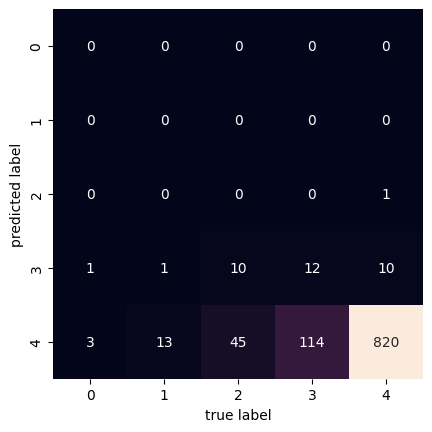

In [206]:
mat = confusion_matrix(y20_test, y20_test_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

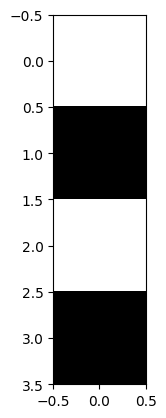

In [207]:
# Read my image in
import cv2
img = cv2.imread('Line2.png', 0) # load grayscale image. Shape (28,28)
#img = cv2.blur(img, (3, 3))

#print(img)
# Plotting an image
pixels = img.reshape((1, 4))
plt.imshow(img, cmap='gray')
#plt.imshow(~img, cmap='gray')
plt.show()
#flattened = img.flatten() # flatten the image, new shape (1,)

In [208]:
my_number = img.reshape((1, -1)) # make a string
my_number

array([[255,   0, 255,   0]], dtype=uint8)

In [209]:
model.predict(my_number)

array([0])

In [ ]:
#answers to all the question have been answered at the appropriate junctions. Please not that to improve the predictive power of my model, I have included only composition related
#features. However, if I had the structure related features the model would have been much more tight and accurate.
#Also, it can be seen that in all the models linear regression had the lowest accuracy while random forrest had the highest due to them containing lot of decision trees.
#There was not a lot of difference observed between different regression models observed like LASSO, linear, ridge. Maybe this is due to the fact that this was such
#a large dataset that significant difference was not observed. Also, maybe due to the fact that the data had no linear trend.
#MAybe there should be a methid to find the correct regresion model that fits the data. There can also be a data fitting done if possible to select the
#right modeling method instead of having to go through various models.
#this is how data fitting or modeling selection is performed on statistical software.
#Apart from formation energy and metallicity prediction, I have also performed bandgap prediction in addition.